In [3]:
install.packages("devtools")
library("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis



In [4]:
install_github("mixOmicsTeam/mixOmics")


formatR      (NA    -> 1.11     ) [CRAN]
futile.op... (NA    -> 1.0.1    ) [CRAN]
lambda.r     (NA    -> 1.2.4    ) [CRAN]
tibble       (3.1.5 -> 3.1.6    ) [CRAN]
glue         (1.4.2 -> 1.5.0    ) [CRAN]
RcppEigen    (NA    -> 0.3.3.9.1) [CRAN]
BH           (NA    -> 1.75.0-0 ) [CRAN]
snow         (NA    -> 0.4-4    ) [CRAN]
futile.lo... (NA    -> 1.4.3    ) [CRAN]
RSpectra     (NA    -> 0.16-0   ) [CRAN]
plyr         (NA    -> 1.8.6    ) [CRAN]
cpp11        (0.4.0 -> 0.4.1    ) [CRAN]
BiocParallel (NA    -> 1.26.2   ) [CRAN]
ggrepel      (NA    -> 0.9.1    ) [CRAN]
gridExtra    (NA    -> 2.3      ) [CRAN]
rARPACK      (NA    -> 0.11-0   ) [CRAN]
matrixStats  (NA    -> 0.61.0   ) [CRAN]
reshape2     (NA    -> 1.4.4    ) [CRAN]
corpcor      (NA    -> 1.6.10   ) [CRAN]
ellipse      (NA    -> 0.4.2    ) [CRAN]
igraph       (NA    -> 1.2.8    ) [CRAN]


Installing 21 packages: formatR, futile.options, lambda.r, tibble, glue, RcppEigen, BH, snow, futile.logger, RSpectra, plyr, cpp11, BiocParallel, ggrepel, gridExtra, rARPACK, matrixStats, reshape2, corpcor, ellipse, igraph

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpfLdpp7/remotes3c5b2fb442/mixOmicsTeam-mixOmics-52292ef/DESCRIPTION’
─  preparing ‘mixOmics’:
─  checking DESCRIPTION meta-information ...It is recommended to use ‘given’ instead of ‘middle’.
    OK
   It is recommended to use ‘given’ instead of ‘middle’.
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘mixOmics_6.17.29.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(mixOmics)
data(multidrug)
X <- multidrug$ABC.trans
dim(X)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.17.29
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




[1] 60 48

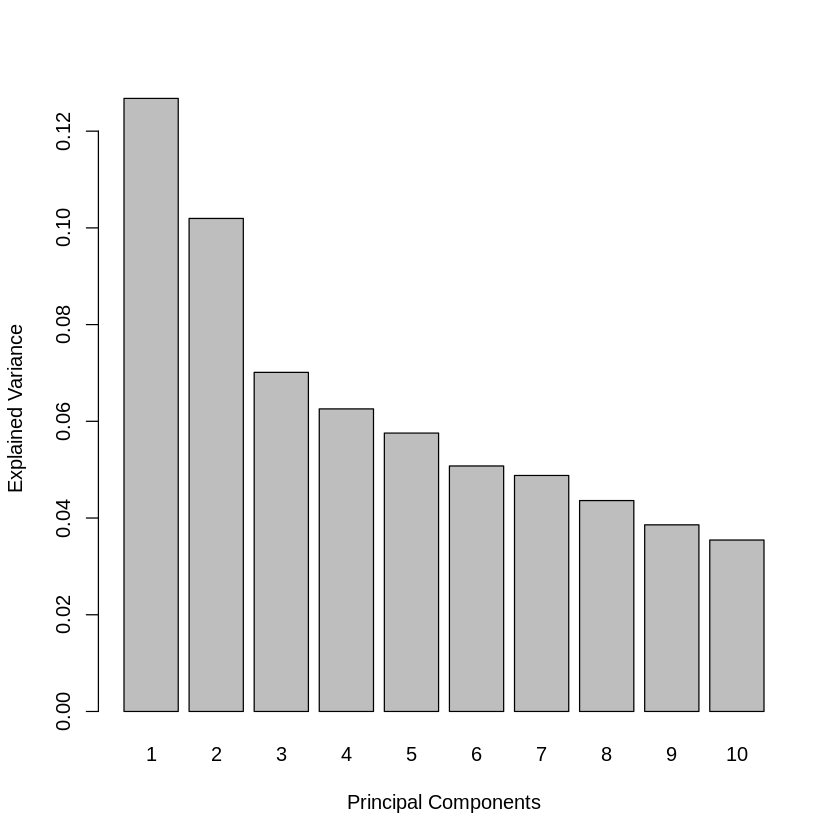

In [ ]:
tune.pca.multi <- tune.pca(X, ncomp=10, scale=TRUE)
plot(tune.pca.multi)

In [ ]:
tune.pca.multi$cum.var

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.1267754 0.2287247 0.2988429 0.3614138 0.4189860 0.4697555 0.5185574 0.5621687 
      PC9      PC10 
0.6007626 0.6362171

In [ ]:
final.pca.multi <- pca(X, ncomp=3, center=TRUE, scale=TRUE)
final.pca.multi

  Eigenvalues for the first 3 principal components, see object$sdev^2: 
     PC1      PC2      PC3 
6.083071 4.891838 3.364484 
  
  Proportion of  explained variance for the first 3 principal components, see object$prop_expl_var: 
       PC1             PC2             PC3      
0.12677541      0.10194929      0.07011818      
  
  Cumulative proportion of  explained variance for the first 3 principal components, see object$cum.var: 
      PC1            PC2            PC3      
0.1267754      0.2287247      0.2988429      
  
  Other available components: 
 -------------------- 
  loading vectors: see object$rotation 
  Other functions: 
 -------------------- 
  plotIndiv, plot, plotVar, selectVar, biplot

In [ ]:
final.pca.multi$var.tot

[1] 47.98305

In [ ]:
final.pca.multi$prop_expl_var$X

PC1        PC2        PC3 
0.12677541 0.10194929 0.07011818

In [ ]:
final.pca.multi$cum.var

PC1       PC2       PC3 
0.1267754 0.2287247 0.2988429

In [ ]:
# identify informative variables
head(selectVar(final.pca.multi, comp=1)$value)

value.var 
ABCE1  0.3242162
ABCD3  0.2647565
ABCF3  0.2613074
ABCA8 -0.2609394
ABCB7  0.2493680
ABCF1  0.2424253

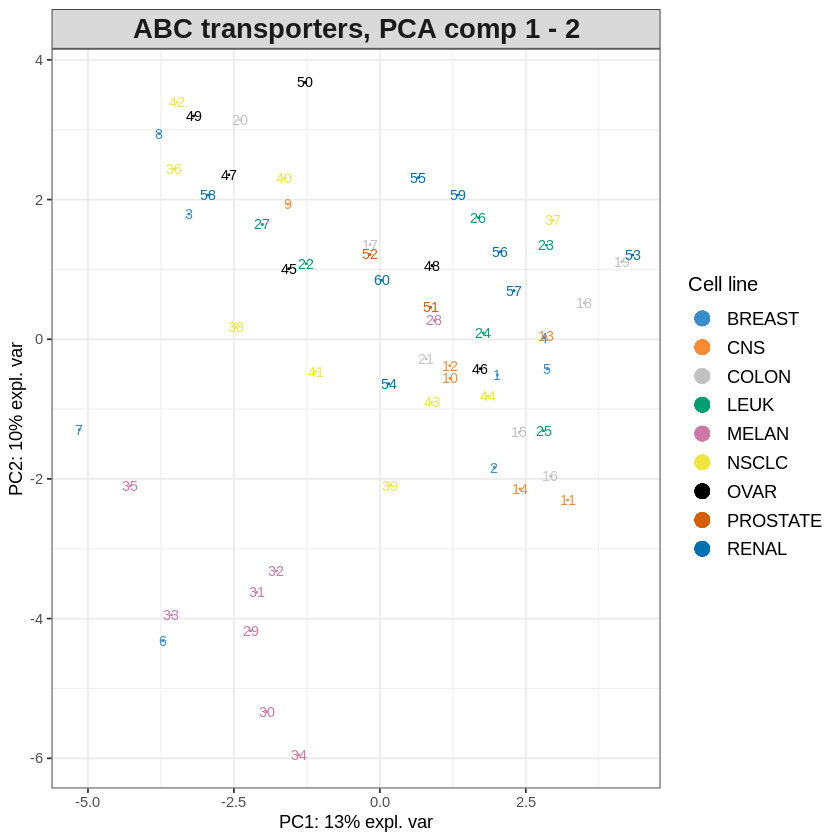

In [ ]:
plotIndiv(final.pca.multi,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group = multidrug$cell.line$Class,
          title = 'ABC transporters, PCA comp 1 - 2',
          legend = TRUE, legend.title = 'Cell line')

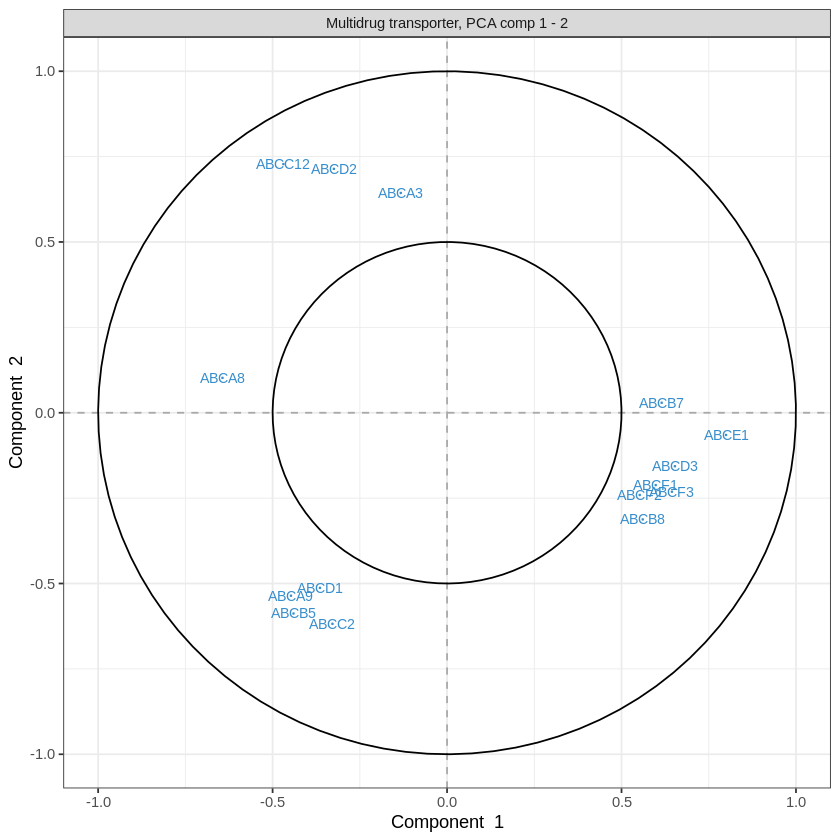

In [ ]:
plotVar(final.pca.multi, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,
        cutoff = 0.5,
        title = 'Multidrug transporter, PCA comp 1 - 2')

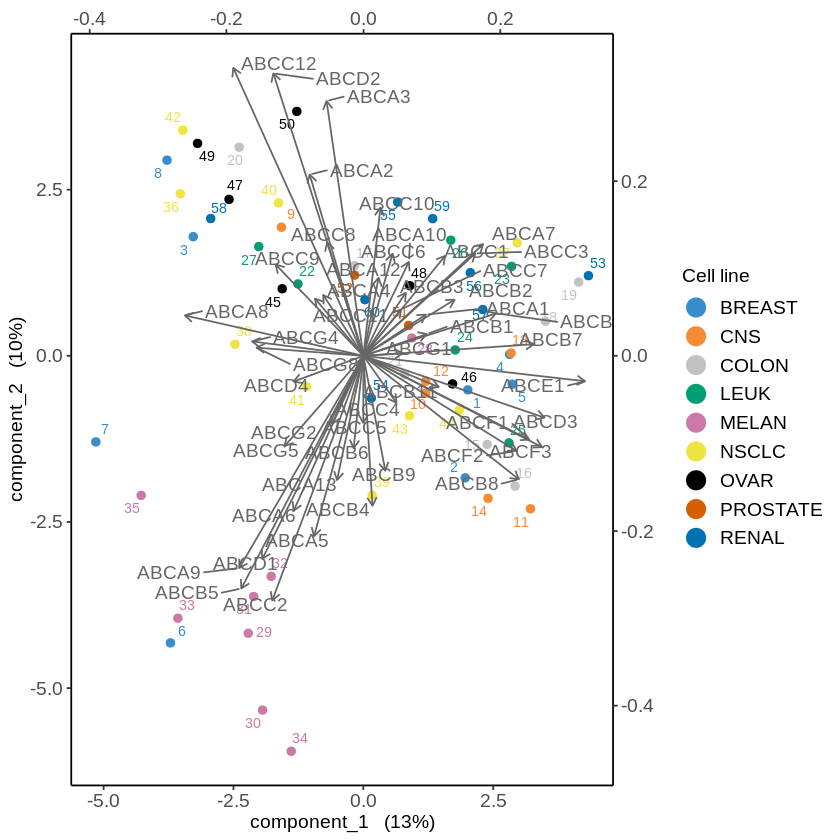

In [ ]:
biplot(final.pca.multi, group = multidrug$cell.line$Class, legend.title = 'Cell line')

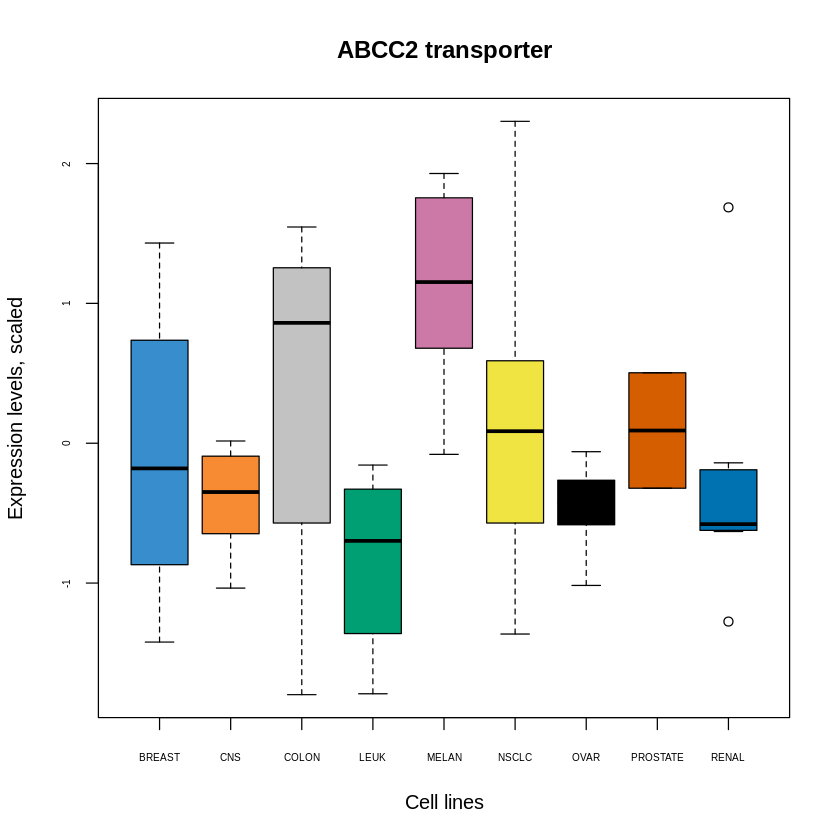

In [ ]:
ABCC2.scale <- scale(X[, 'ABCC2'], center = TRUE, scale = TRUE)

boxplot(ABCC2.scale ~
        multidrug$cell.line$Class, col = color.mixo(1:9),
        xlab = 'Cell lines', ylab = 'Expression levels, scaled',
        par(cex.axis = 0.5), # Font size
        main = 'ABCC2 transporter')

In [ ]:
# sparse PCA
grid.keepX <- c(seq(5, 30, 5))
# grid.keepX  # To see the grid

set.seed(30) # For reproducibility with this handbook, remove otherwise
tune.spca.result <- tune.spca(X, ncomp = 3, 
                              folds = 5, 
                              test.keepX = grid.keepX, nrepeat = 10) 

# Consider adding up to 50 repeats for more stable results
tune.spca.result$choice.keepX

comp1 comp2 comp3 
   15    15    25

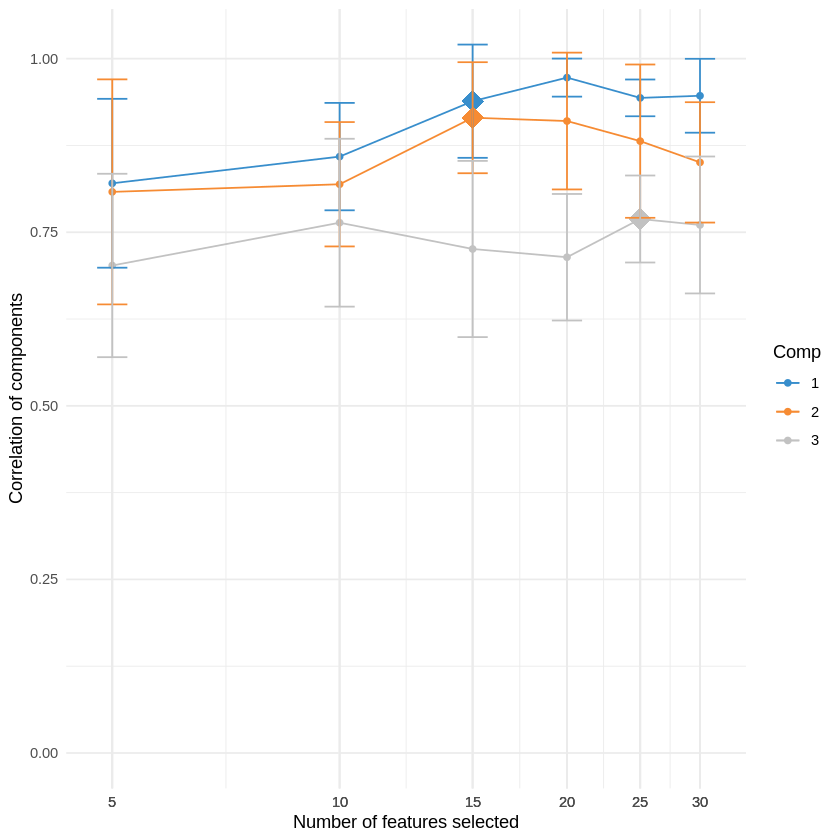

In [ ]:
plot(tune.spca.result)

In [ ]:
# By default center = TRUE, scale = TRUE
keepX.select <- tune.spca.result$choice.keepX[1:2]

final.spca.multi <- spca(X, ncomp = 2, keepX = keepX.select)

# Proportion of explained variance:
final.spca.multi$prop_expl_var$X

PC1       PC2 
0.1171694 0.1004163

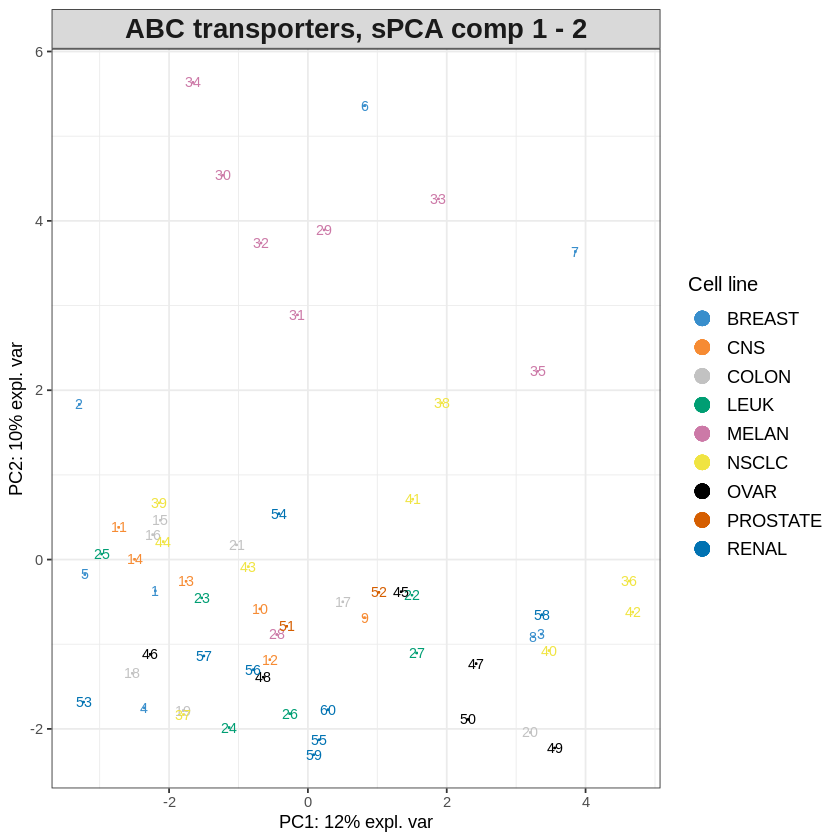

In [ ]:
plotIndiv(final.spca.multi,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group = multidrug$cell.line$Class,
          title = 'ABC transporters, sPCA comp 1 - 2',
          legend = TRUE, legend.title = 'Cell line')

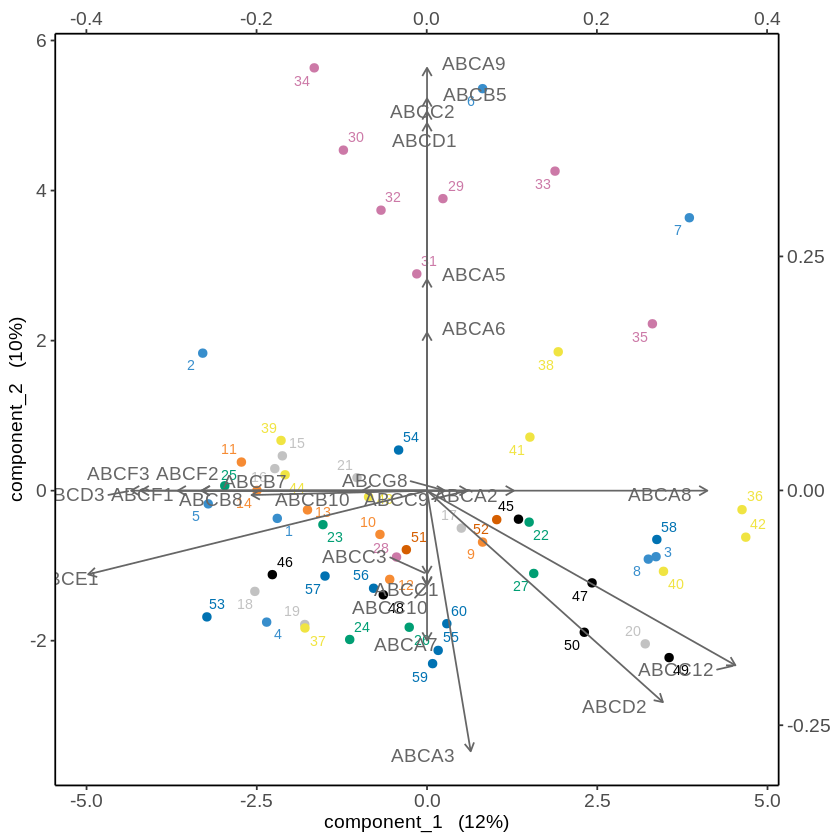

In [ ]:
biplot(final.spca.multi, group = multidrug$cell.line$Class, legend = FALSE)

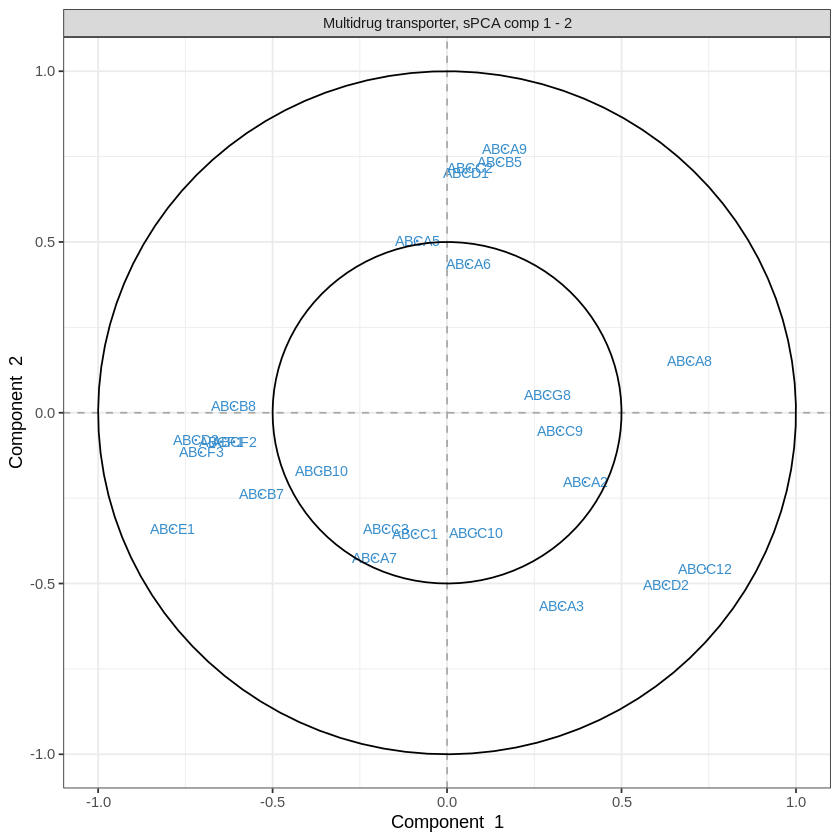

In [ ]:
plotVar(final.spca.multi, comp = c(1, 2), var.names = TRUE,
        cex = 3,
        title = 'Multidrug transporter, sPCA comp 1 - 2')

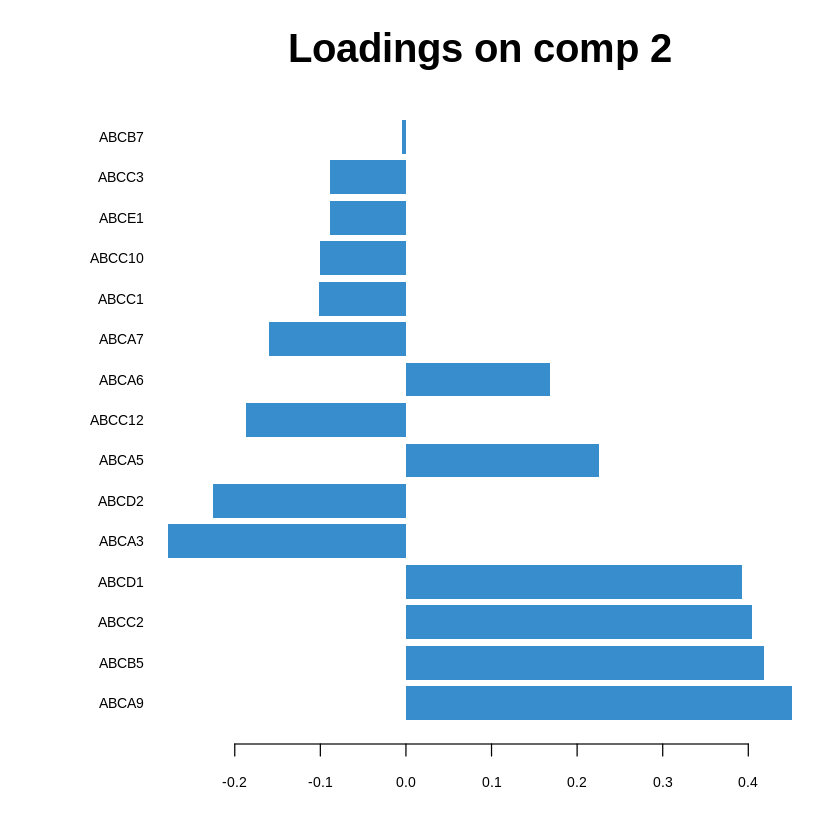

In [ ]:
plotLoadings(final.spca.multi, comp = 2)

In [ ]:
data(liver.toxicity)
X <- liver.toxicity$gene
Y <- liver.toxicity$clinic

In [ ]:
head(data.frame(rownames(X), rownames(Y)))

rownames.X. rownames.Y.
1 ID202       ID202      
2 ID203       ID203      
3 ID204       ID204      
4 ID206       ID206      
5 ID208       ID208      
6 ID209       ID209

In [ ]:
y <- liver.toxicity$clinic[, "ALB.g.dL."]

In [ ]:
y

[1] 4.9 5.0 5.0 5.0 5.1 5.1 5.1 4.9 5.1 4.9 4.7 5.2 5.2 4.9 4.7 5.0 4.7 5.0 5.1
[20] 5.0 5.1 4.8 4.9 4.9 4.7 4.9 5.1 4.9 5.0 4.9 4.9 4.9 5.4 5.1 5.6 5.3 5.5 5.4
[39] 4.4 4.5 4.9 5.2 5.1 5.2 5.1 5.1 5.2 4.6 5.3 5.1 5.3 5.2 5.3 5.3 4.6 4.7 5.5
[58] 5.0 5.0 5.4 5.2 4.4 4.8 4.6

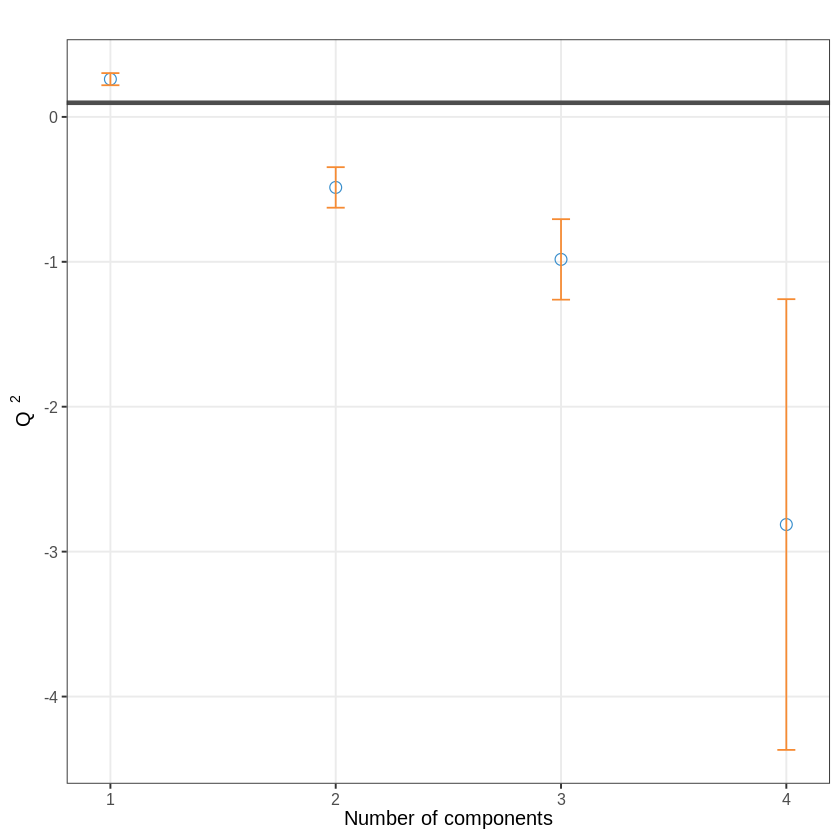

In [ ]:
tune.pls1.liver <- pls(X = X, Y = y, ncomp = 4, mode = 'regression')
set.seed(33)
Q2.pls1.liver <- perf(tune.pls1.liver, validatio = 'Mfold',
                      folds = 10, nrepeat = 5)
plot(Q2.pls1.liver, criterion = 'Q2')                      

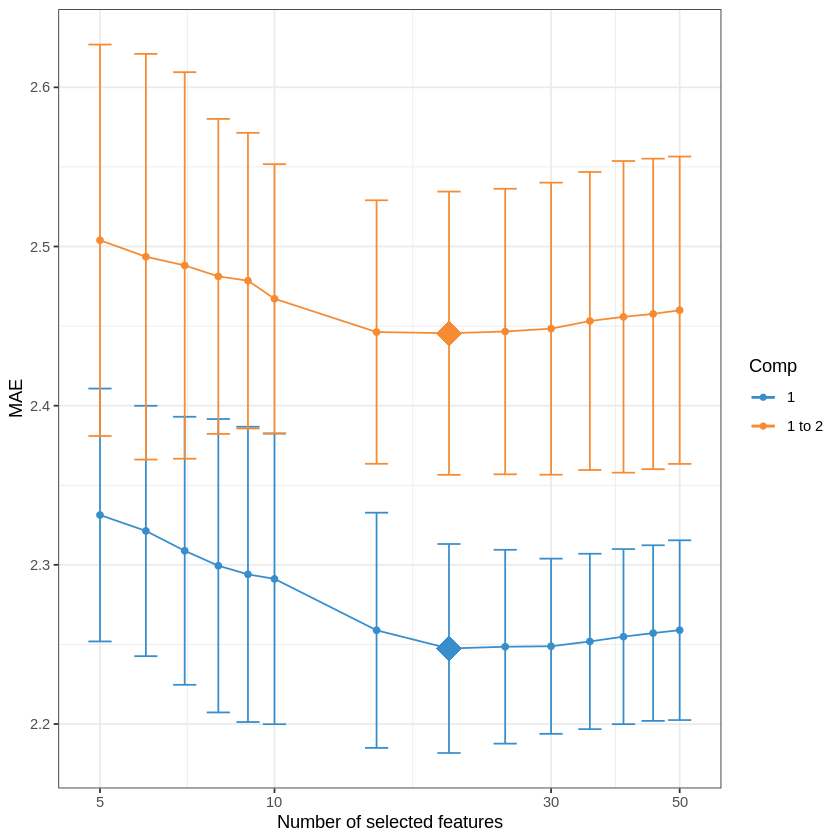

In [ ]:
list.keepX <- c(5:10, seq(15, 50, 5))

set.seed(33)
tune.spls1.MAE <- tune.spls(X, y, ncomp = 2,
                            test.keepX = list.keepX,
                            validation = 'Mfold',
                            folds = 10,
                            nrepeat = 5,
                            progressBar = FALSE,
                            measure = 'MAE')
plot(tune.spls1.MAE)                            

In [ ]:
choice.ncomp <- tune.spls1.MAE$choice.ncomp$ncomp
# Optimal number of variables to select in X based on the MAE criterion
# We stop at choice.ncomp
choice.keepX <- tune.spls1.MAE$choice.keepX[1:choice.ncomp]  

choice.ncomp

[1] 1

In [ ]:
choice.keepX

comp1 
   20

In [ ]:
spls1.liver <- spls(X, y, ncomp = choice.ncomp, keepX = choice.keepX, mode = 'regression')

In [ ]:
selectVar(spls1.liver, comp = 1)$X$name

[1] "A_43_P11285"  "A_42_P505480" "A_42_P678904" "A_43_P10088"  "A_42_P591665"
 [6] "A_42_P794613" "A_43_P12448"  "A_42_P576823" "A_42_P836392" "A_43_P16774" 
[11] "A_43_P12913"  "A_43_P10005"  "A_42_P618538" "A_42_P698972" "A_42_P843603"
[16] "A_42_P792017" "A_42_P490786" "A_42_P806882" "A_43_P14916"  "A_42_P496340"

In [ ]:
spls1.liver$prop_expl_var

$X
     comp1 
0.08150917 

$Y
comp1 
    1

In [ ]:
tune.pls1.liver$prop_expl_var$X

comp1      comp2      comp3      comp4 
0.11079101 0.14010577 0.21714518 0.06433377

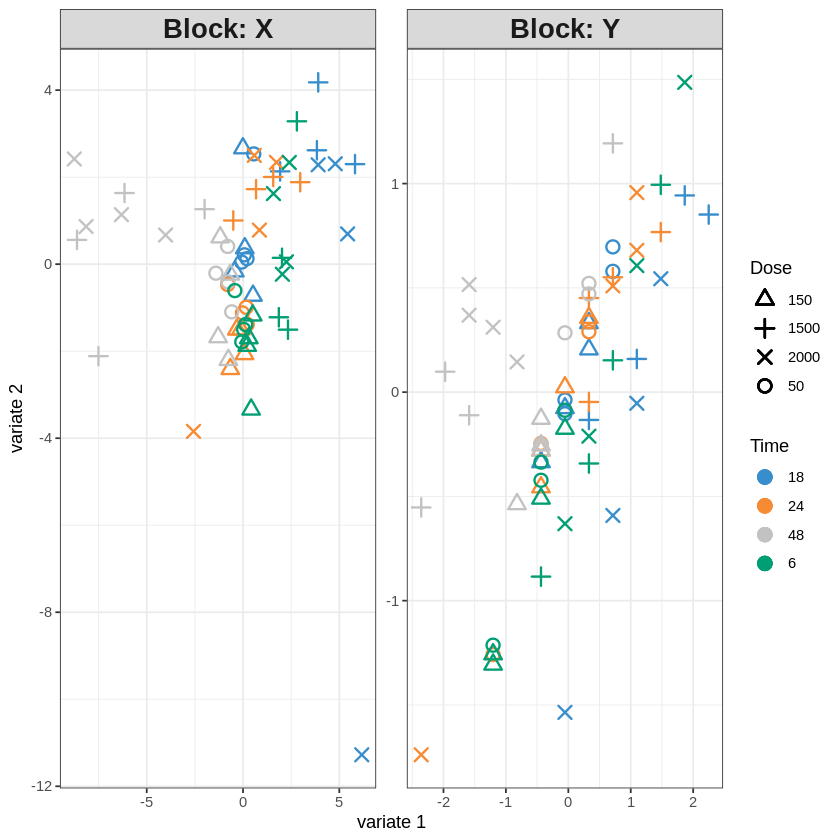

In [ ]:
spls1.liver.c2 <- spls(X, y, ncomp = 2, keepX = c(rep(choice.keepX, 2)), 
                   mode = "regression")

plotIndiv(spls1.liver.c2,
          group = liver.toxicity$treatment$Time.Group,
          pch = as.factor(liver.toxicity$treatment$Dose.Group),
          legend = TRUE, legend.title = 'Time', legend.title.pch = 'Dose')

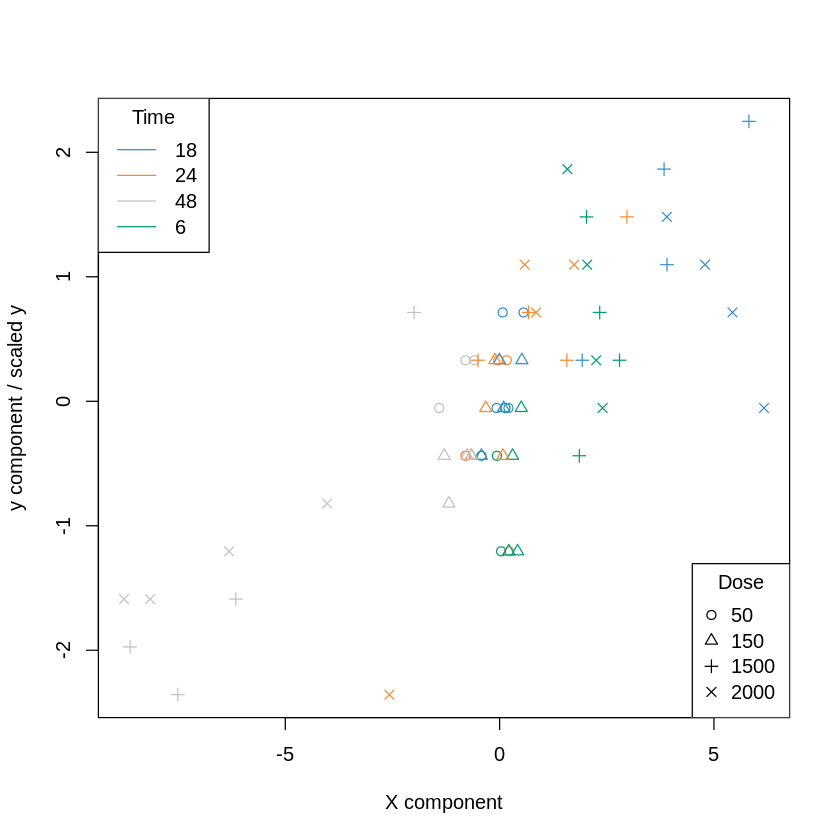

In [ ]:
time.liver <- factor(liver.toxicity$treatment$Time.Group,
                      levels = c('18', '24', '48', '6'))
dose.liver <- factor(liver.toxicity$treatment$Dose.Group,
                      levels = c('50', '150', '1500', '2000'))   
# Set up colours and symbols
col.liver <- color.mixo(time.liver)
pch.liver <- as.numeric(dose.liver)

plot(spls1.liver$variates$X, spls1.liver$variates$Y,
     xlab = 'X component', ylab = 'y component / scaled y',
     col = col.liver, pch = pch.liver)
legend('topleft', col = color.mixo(1:4), legend = levels(time.liver),
       lty = 1, title = 'Time')
legend('bottomright', legend = levels(dose.liver), pch = 1:4,
       title = 'Dose')                                         

In [ ]:
cor(spls1.liver$variates$X, spls1.liver$variates$Y)

comp1    
comp1 0.7515489

In [ ]:
set.seed(33)  # For reproducibility with this handbook, remove otherwise

# PLS1 model and performance
pls1.liver <- pls(X, y, ncomp = choice.ncomp, mode = "regression")
perf.pls1.liver <- perf(pls1.liver, validation = "Mfold", folds =10, 
                   nrepeat = 5, progressBar = FALSE)
perf.pls1.liver$measures$MSEP$summary

feature comp mean      sd        
1 Y       1    0.7281681 0.04134627

In [ ]:
# To extract values across all repeats:
# perf.pls1.liver$measures$MSEP$values

# sPLS1 performance
perf.spls1.liver <- perf(spls1.liver, validation = "Mfold", folds = 10, 
                   nrepeat = 5, progressBar = FALSE)
perf.spls1.liver$measures$MSEP$summary

feature comp mean      sd        
1 Y       1    0.5958565 0.02697727

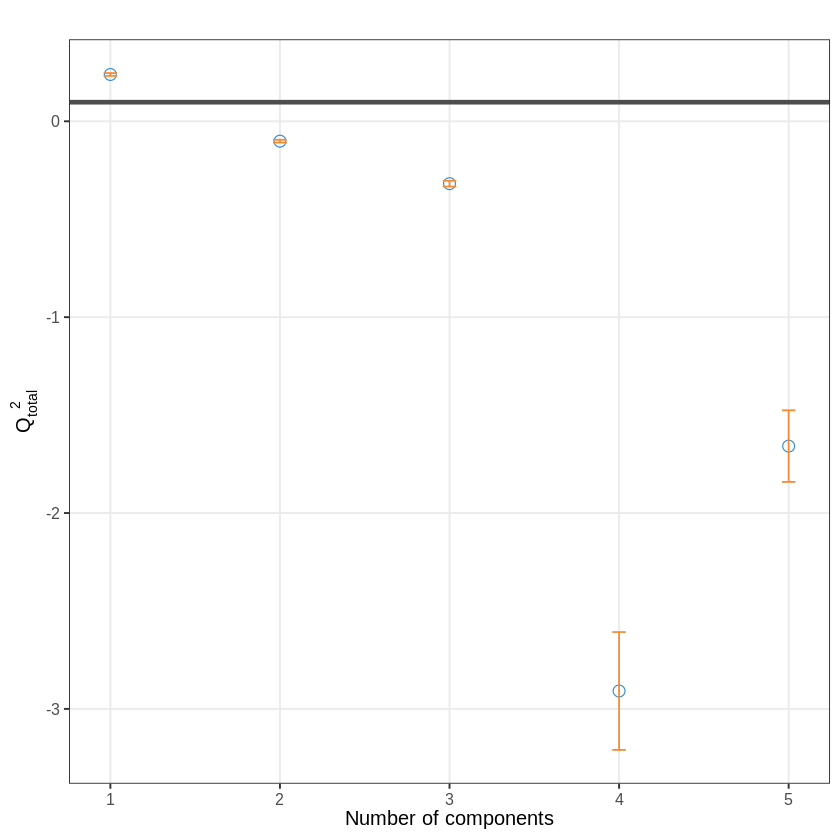

In [ ]:
tune.pls2.liver <- pls(X = X, Y = Y, ncomp = 5, mode = 'regression')

set.seed(33)  # For reproducibility with this handbook, remove otherwise
Q2.pls2.liver <- perf(tune.pls2.liver, validation = 'Mfold', folds = 10, 
                      nrepeat = 5)
plot(Q2.pls2.liver, criterion = 'Q2.total')

In [ ]:
# This code may take several min to run, parallelisation option is possible
list.keepX <- c(seq(5, 50, 5))
list.keepY <- c(3:10)

set.seed(33)  # For reproducibility with this handbook, remove otherwise
tune.spls.liver <- tune.spls(X, Y, test.keepX = list.keepX, 
                             test.keepY = list.keepY, ncomp = 2, 
                             nrepeat = 1, folds = 10, mode = 'regression', 
                             measure = 'cor', 
                            #   the following uses two CPUs for faster computation
                            # it can be commented out
                            BPPARAM = BiocParallel::SnowParam(workers = 2)
                            )

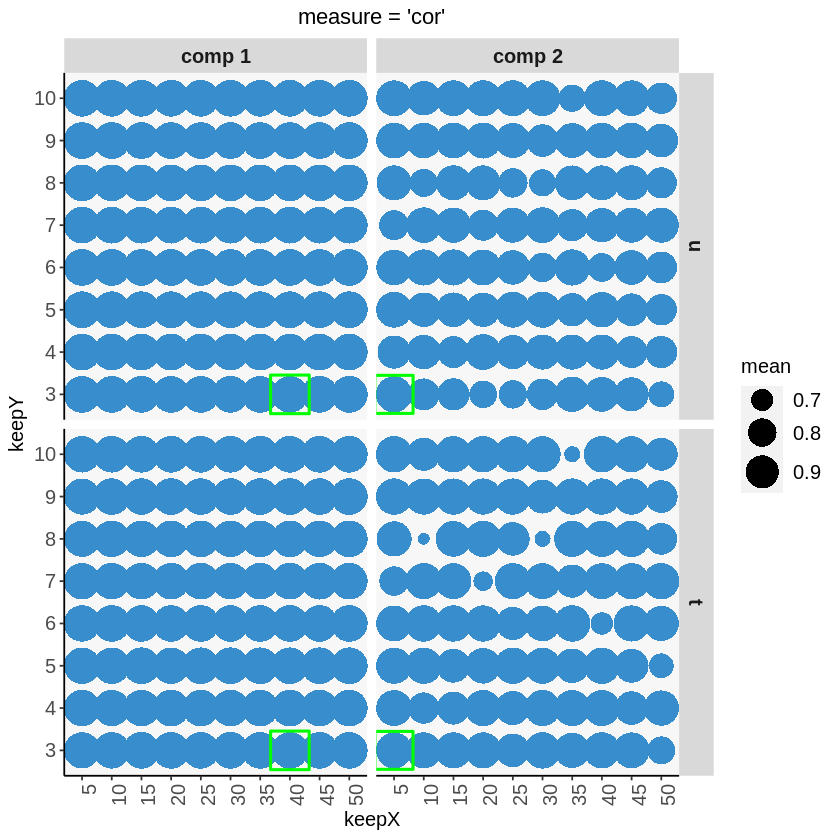

In [ ]:
plot(tune.spls.liver)

In [ ]:
#Optimal parameters
choice.keepX <- tune.spls.liver$choice.keepX
choice.keepY <- tune.spls.liver$choice.keepY
choice.ncomp <- length(choice.keepX)

spls2.liver <- spls(X, Y, ncomp = choice.ncomp, 
                   keepX = choice.keepX,
                   keepY = choice.keepY,
                   mode = "regression")

In [ ]:
spls2.liver$prop_expl_var

$X
     comp1      comp2 
0.19955426 0.08074105 

$Y
    comp1     comp2 
0.3650105 0.2159239

In [ ]:
selectVar(spls2.liver, comp=1)$X$value

value.var   
A_42_P620915 -0.360149246
A_43_P14131  -0.336224084
A_42_P578246 -0.259773502
A_43_P11724   0.251422605
A_42_P840776 -0.239632694
A_42_P675890 -0.229730890
A_42_P809565 -0.227935032
A_43_P23376  -0.227647013
A_43_P10606  -0.227462623
A_43_P17415  -0.223443460
A_42_P758454 -0.223296845
A_42_P802628 -0.193968259
A_43_P22616  -0.173539127
A_42_P834104 -0.164714452
A_42_P705413 -0.162772549
A_42_P684538 -0.161645359
A_43_P16842   0.129580617
A_43_P10003  -0.113624030
A_42_P825290 -0.101540668
A_42_P738559 -0.095524279
A_43_P11570   0.095146630
A_42_P681650 -0.093145353
A_42_P586270 -0.079871228
A_43_P12400  -0.077742127
A_42_P769476 -0.076350561
A_42_P814010 -0.074734510
A_42_P484423 -0.064449881
A_42_P636498 -0.060750899
A_43_P12806  -0.056700301
A_43_P12832  -0.049575351
A_42_P610788 -0.045669132
A_42_P470649  0.045161613
A_43_P15425   0.044673315
A_42_P681533 -0.039841938
A_42_P669630 -0.026061358
A_43_P14864  -0.022642386
A_42_P698740 -0.012942361
A_42_P550264 -0.011908488
A_43_P10006  -0.010807982
A_42_P469551 -0.001794043

In [ ]:
vip.spls2.liver <- vip(spls2.liver)
# just a head
head(vip.spls2.liver[selectVar(spls2.liver, comp = 1)$X$name,1])

A_42_P620915  A_43_P14131 A_42_P578246  A_43_P11724 A_42_P840776 A_42_P675890 
    20.10394     18.76841     14.50085     14.03470     13.37657     12.82384

In [ ]:
perf.spls2.liver <- perf(spls2.liver, validation = 'Mfold', folds = 10, nrepeat = 5)
# Extract stability
stab.spls2.liver.comp1 <- perf.spls2.liver$features$stability.X$comp1
# Averaged stability of the X selected features across CV runs, as shown in Table
stab.spls2.liver.comp1[1:choice.keepX[1]]

# We extract the stability measures of only the variables selected in spls2.liver
extr.stab.spls2.liver.comp1 <- stab.spls2.liver.comp1[selectVar(spls2.liver, 
                                                                  comp =1)$X$name]

A_42_P578246 A_42_P620915 A_42_P675890 A_42_P684538 A_42_P705413 A_42_P738559 
        1.00         1.00         1.00         1.00         1.00         1.00 
A_42_P758454 A_42_P802628 A_42_P809565 A_42_P814010 A_42_P825290 A_42_P834104 
        1.00         1.00         1.00         1.00         1.00         1.00 
A_42_P840776  A_43_P10003  A_43_P10606  A_43_P11724  A_43_P12400  A_43_P14131 
        1.00         1.00         1.00         1.00         1.00         1.00 
 A_43_P16842  A_43_P17415  A_43_P22616  A_43_P23376 A_42_P681650 A_42_P484423 
        1.00         1.00         1.00         1.00         0.98         0.96 
A_42_P769476 A_42_P586270  A_43_P11570 A_42_P636498  A_43_P12806 A_42_P470649 
        0.94         0.92         0.92         0.90         0.88         0.86 
A_42_P681533  A_43_P12832 A_42_P610788  A_43_P15425 A_42_P669630  A_43_P14864 
        0.86         0.86         0.72         0.72         0.66         0.60 
A_42_P698740 A_42_P550264  A_43_P10006 A_42_P469551 
        0.56         0.52         0.42         0.34

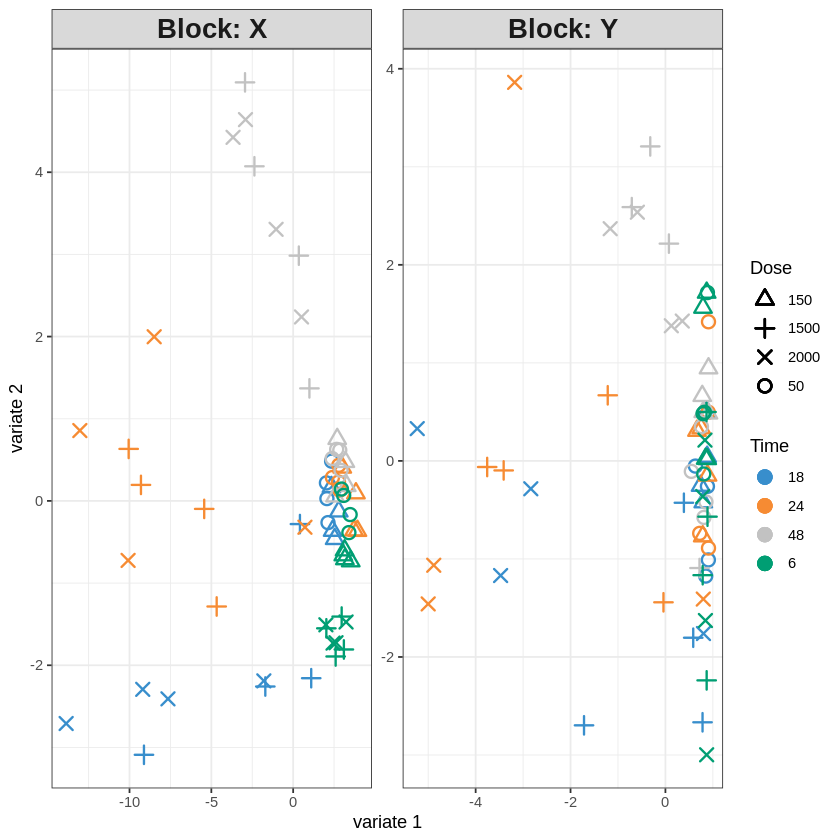

In [ ]:
plotIndiv(spls2.liver, ind.names = FALSE, 
          group = liver.toxicity$treatment$Time.Group, 
          pch = as.factor(liver.toxicity$treatment$Dose.Group), 
          col.per.group = color.mixo(1:4),
          legend = TRUE, legend.title = 'Time', 
          legend.title.pch = 'Dose')

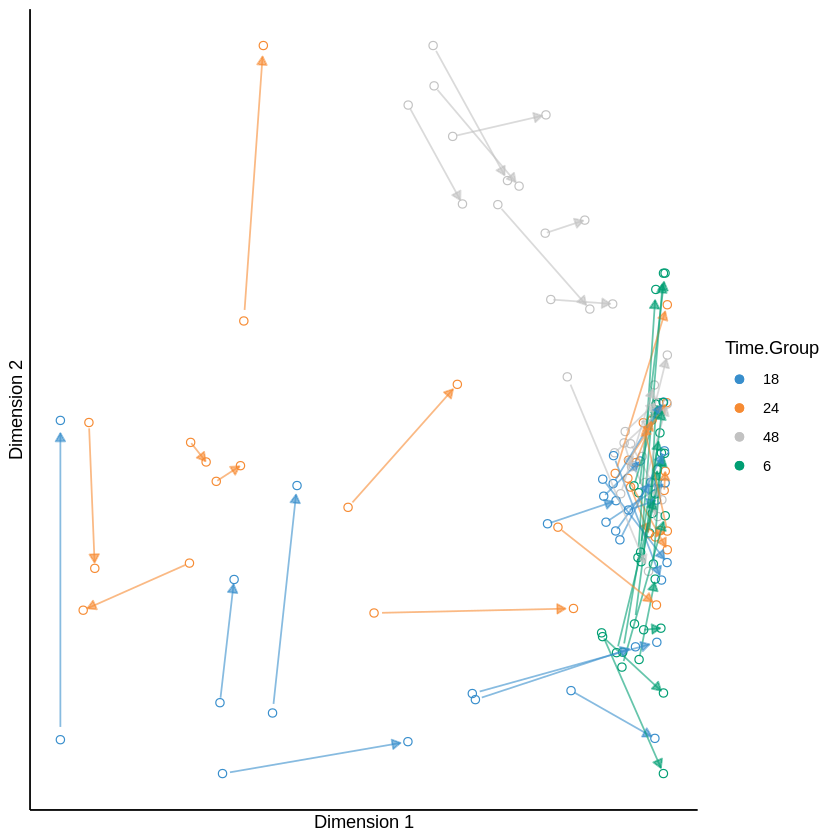

In [ ]:
plotArrow(spls2.liver, ind.names = FALSE, 
          group = liver.toxicity$treatment$Time.Group,
          col.per.group = color.mixo(1:4),
          legend.title = 'Time.Group')

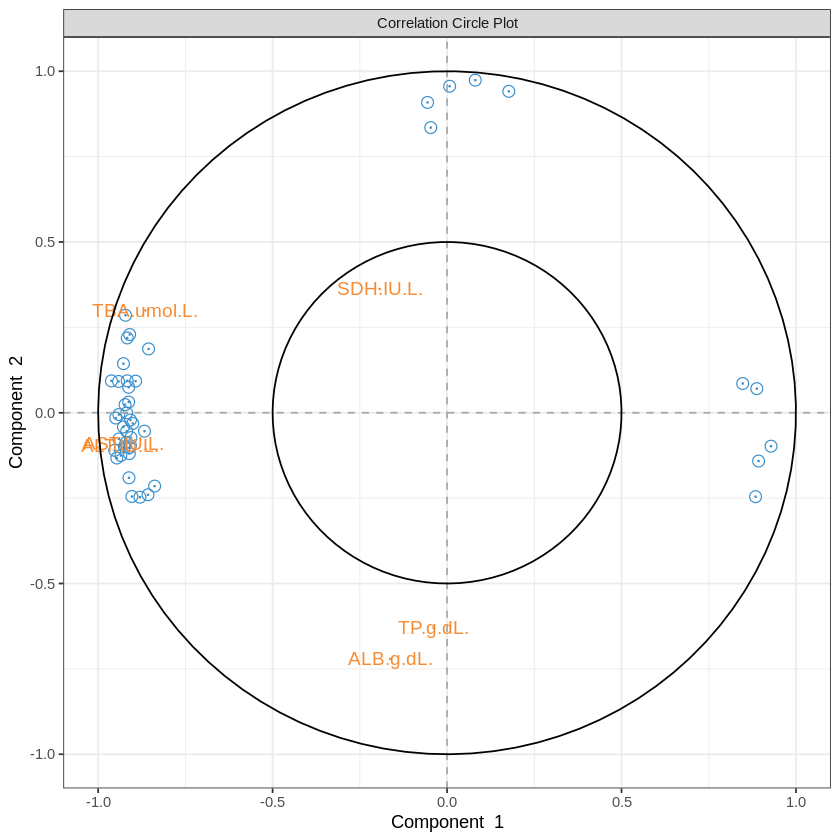

In [ ]:
plotVar(spls2.liver, cex = c(3,4), var.names = c(FALSE, TRUE))

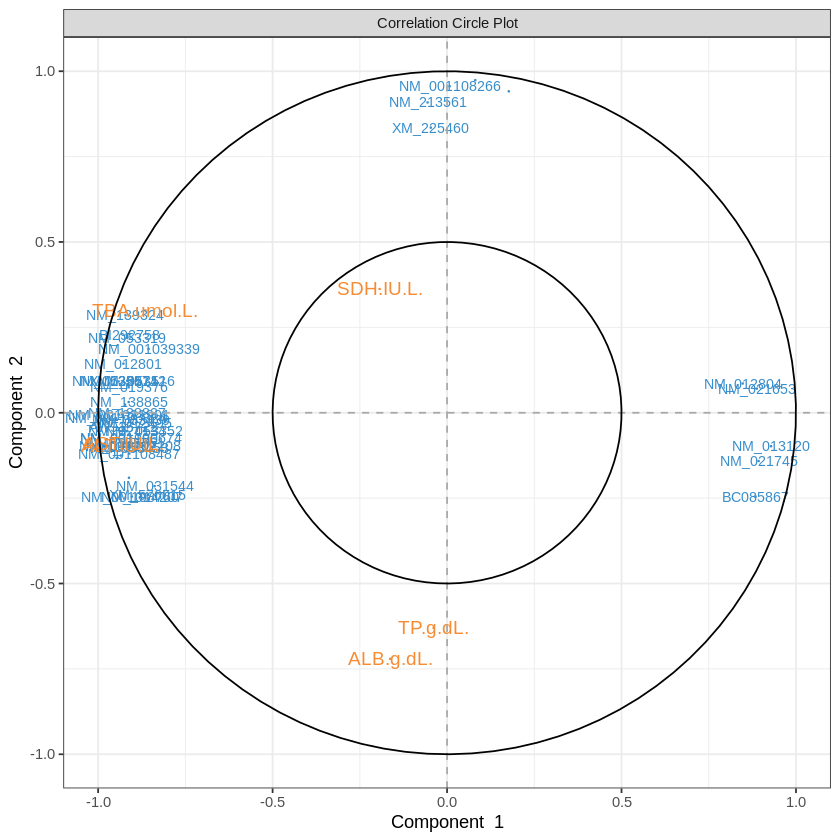

In [ ]:
plotVar(spls2.liver,
        var.names = list(X.label = liver.toxicity$gene.ID[,'geneBank'],
        Y.label = TRUE), cex = c(3,4))

In [ ]:
# Define red and green colours for the edges
color.edge <- color.GreenRed(50)

# X11()  # To open a new window for Rstudio
network(spls2.liver, comp = 1:2,
        cutoff = 0.7,
        shape.node = c("rectangle", "circle"),
        color.node = c("cyan", "pink"),
        color.edge = color.edge,
        # To save the plot, otherwise comment out:
        save = 'pdf', name.save = 'network_liver')

In [ ]:
# X11()  # To open a new window if the graphic is too large
cim(spls2.liver, comp = 1:2, xlab = "clinic", ylab = "genes",
    # To save the plot, otherwise comment out:
    save = 'pdf', name.save = 'cim_liver')

In [ ]:
# Comparisons of final models (PLS, sPLS)

## PLS
pls.liver <- pls(X, Y, mode = 'regression', ncomp = 2)
perf.pls.liver <-  perf(pls.liver, validation = 'Mfold', folds = 10, 
                        nrepeat = 5)

## Performance for the sPLS model ran earlier
perf.spls.liver <-  perf(spls2.liver, validation = 'Mfold', folds = 10, 
                         nrepeat = 5)

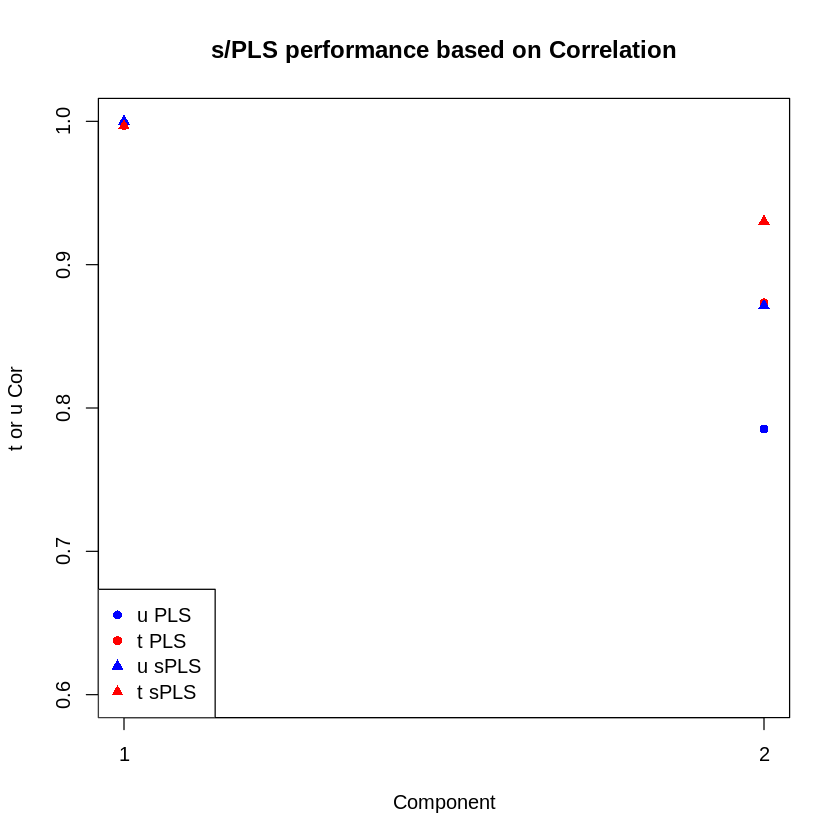

In [ ]:
plot(c(1,2), perf.pls.liver$measures$cor.upred$summary$mean, 
     col = 'blue', pch = 16, 
     ylim = c(0.6,1), xaxt = 'n',
     xlab = 'Component', ylab = 't or u Cor', 
     main = 's/PLS performance based on Correlation')
axis(1, 1:2)  # X-axis label
points(perf.pls.liver$measures$cor.tpred$summary$mean, col = 'red', pch = 16)
points(perf.spls.liver$measures$cor.upred$summary$mean, col = 'blue', pch = 17)
points(perf.spls.liver$measures$cor.tpred$summary$mean, col = 'red', pch = 17)
legend('bottomleft', col = c('blue', 'red', 'blue', 'red'), 
       pch = c(16, 16, 17, 17), c('u PLS', 't PLS', 'u sPLS', 't sPLS'))

# 3. PLS-DA on the SRBCT case study

In [ ]:
data(srbct)
X <- srbct$gene

Y <- srbct$class
dim(X); dim(Y)

[1]   63 2308

NULL

In [ ]:
summary(Y)

EWS  BL  NB RMS 
 23   8  12  20

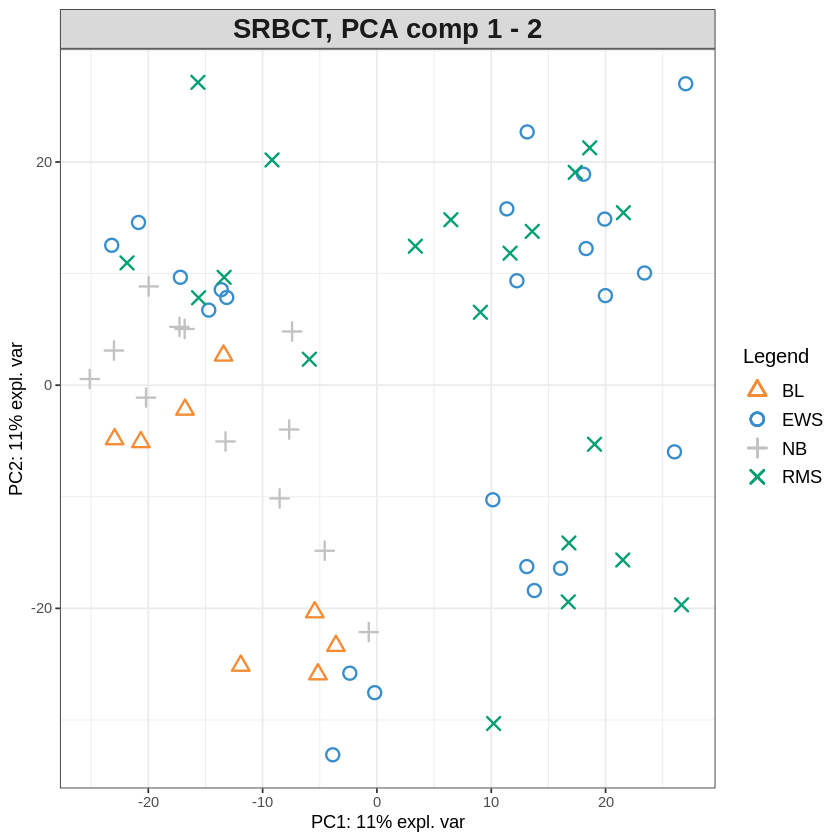

In [ ]:
pca.srbct <- pca(X, ncomp = 3, scale = TRUE)

plotIndiv(pca.srbct, group = srbct$class, ind.names = FALSE, legend = TRUE, title = 'SRBCT, PCA comp 1 - 2')

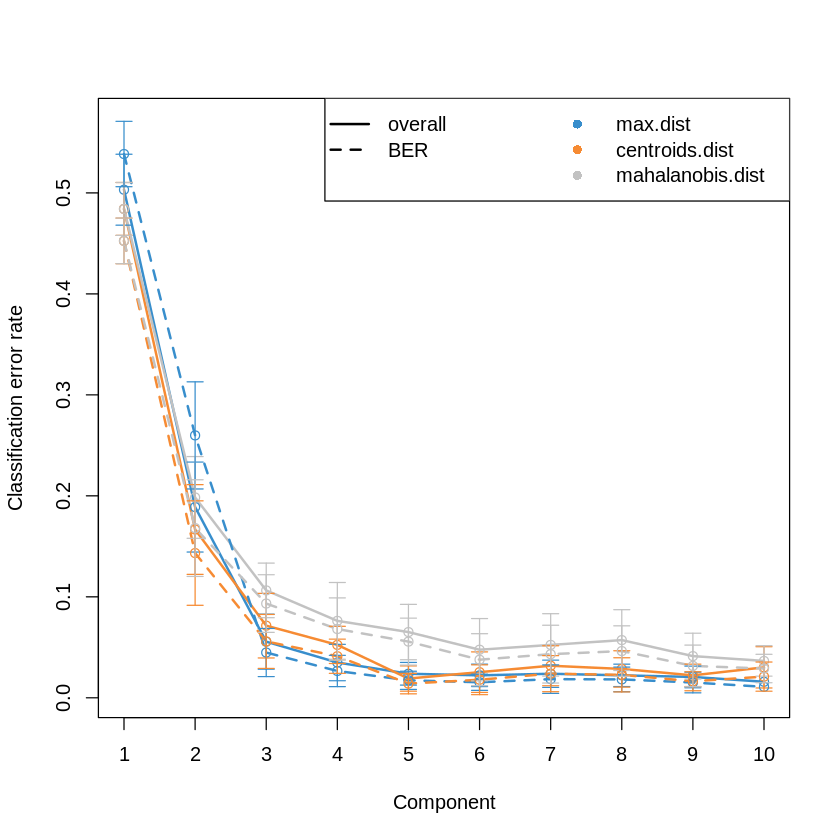

In [ ]:
plsda.srbct <- plsda(X,Y, ncomp = 10)

set.seed(30) # For reproducibility with this handbook, remove otherwise
perf.plsda.srbct <- perf(plsda.srbct, validation = 'Mfold', folds = 3, 
                  progressBar = FALSE,  # Set to TRUE to track progress
                  nrepeat = 10)         # We suggest nrepeat = 50

plot(perf.plsda.srbct, sd = TRUE, legend.position = 'horizontal')

In [ ]:
perf.plsda.srbct


Call:
 perf.mixo_plsda(object = plsda.srbct, validation = "Mfold", folds = 3, nrepeat = 10, progressBar = FALSE) 

 Main numerical outputs: 
 -------------------- 
 Error rate (overall or BER) for each component and for each distance: see object$error.rate 
 Error rate per class, for each component and for each distance: see object$error.rate.class 
 Prediction values for each component: see object$predict 
 Classification of each sample, for each component and for each distance: see object$class 
 AUC values: see object$auc if auc = TRUE 

 Visualisation Functions: 
 -------------------- 
 plot 

In [ ]:
final.plsda.srbct <- plsda(X, Y, ncomp = 3)

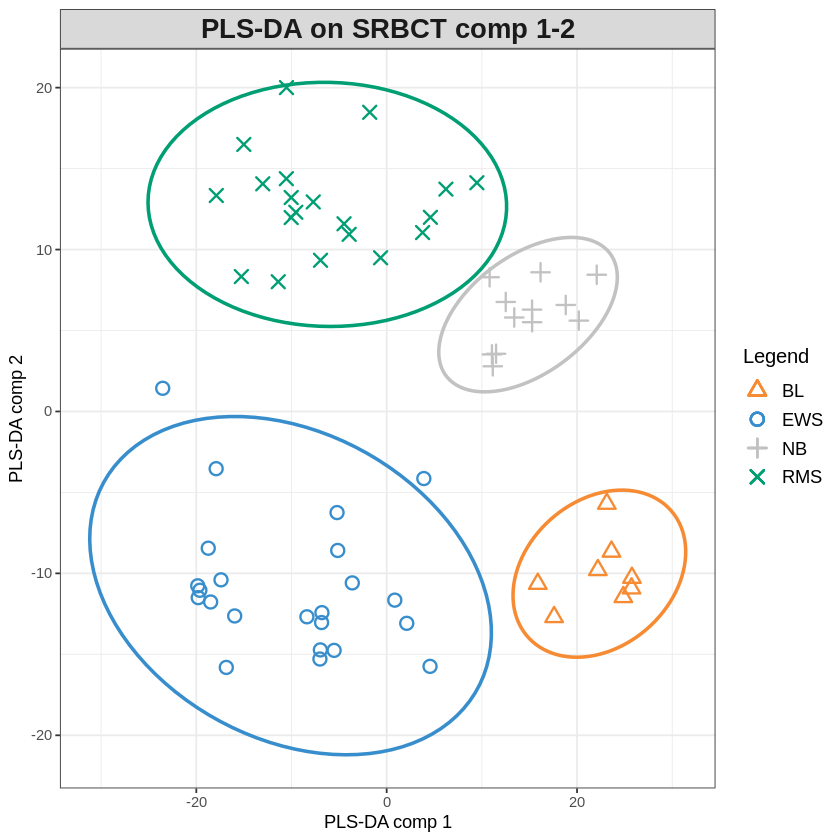

In [ ]:
plotIndiv(final.plsda.srbct, ind.names = FALSE, legend=TRUE,
          comp=c(1,2), ellipse = TRUE, 
          title = 'PLS-DA on SRBCT comp 1-2',
          X.label = 'PLS-DA comp 1', Y.label = 'PLS-DA comp 2')

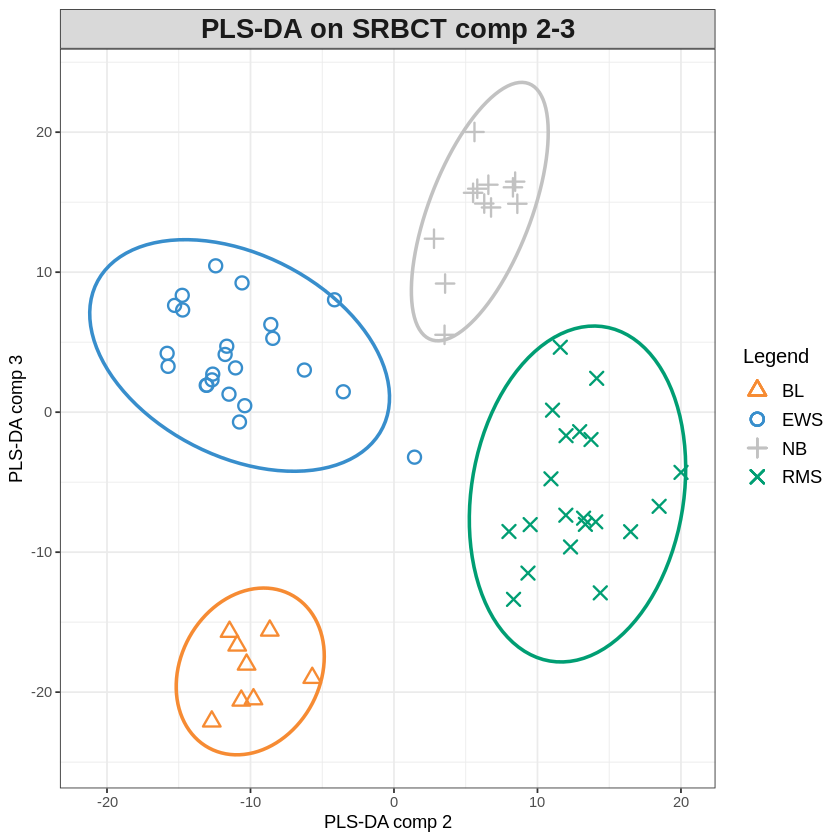

In [ ]:
plotIndiv(final.plsda.srbct, ind.names = FALSE, legend=TRUE,
          comp=c(2,3), ellipse = TRUE, 
          title = 'PLS-DA on SRBCT comp 2-3',
          X.label = 'PLS-DA comp 2', Y.label = 'PLS-DA comp 3')

In [ ]:
set.seed(30) # For reproducibility with this handbook, remove otherwise
perf.final.plsda.srbct <- perf(final.plsda.srbct, validation = 'Mfold', 
                               folds = 3, 
                               progressBar = TRUE, # TRUE to track progress
                               nrepeat = 50) 


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%


In [ ]:
perf.final.plsda.srbct$error.rate$BER[, 'max.dist']

comp1      comp2      comp3 
0.54944565 0.24639674 0.06015217

In [ ]:
perf.final.plsda.srbct$error.rate.class$max.dist

comp1     comp2      comp3    
EWS 0.2347826 0.08608696 0.1026087
BL  0.7900000 0.50250000 0.0000000
NB  0.3750000 0.33000000 0.0500000
RMS 0.7980000 0.06700000 0.0880000

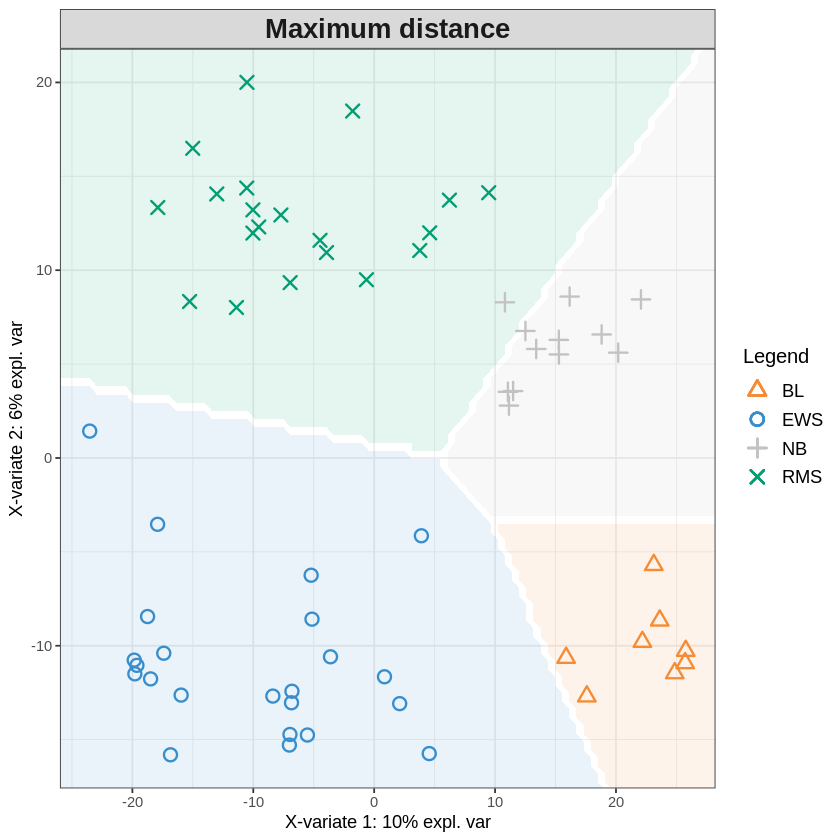

In [ ]:
# Background prediction
background.max <- background.predict(final.plsda.srbct, comp.predicted = 2, dist = 'max.dist')

plotIndiv(final.plsda.srbct, comp = 1:2, group = srbct$class,
          ind.names = FALSE, title = 'Maximum distance',
          legend = TRUE,  background = background.max)

In [ ]:
# Grid of possible keepX values that will be tested for each comp
list.keepX <- c(1:10,  seq(20, 100, 10))
list.keepX

# This chunk takes ~ 2 min to run
# Some convergence issues may arise but it is ok as this is run on CV folds
tune.splsda.srbct <- tune.splsda(X, Y, ncomp = 4, validation = 'Mfold', 
                                 folds = 5, dist = 'max.dist', 
                                 test.keepX = list.keepX, nrepeat = 10)

[1]   1   2   3   4   5   6   7   8   9  10  20  30  40  50  60  70  80  90 100

In [ ]:
head(tune.splsda.srbct$error.rate)

comp1     comp2     comp3      comp4     
1 0.6262772 0.2967754 0.07663949 0.01548007
2 0.5699728 0.2959420 0.05585145 0.01781703
3 0.5569022 0.2879801 0.04272645 0.01781703
4 0.5346649 0.2847645 0.03413949 0.01673007
5 0.5245290 0.2786775 0.02893116 0.01673007
6 0.5253170 0.2763406 0.02559783 0.01564312

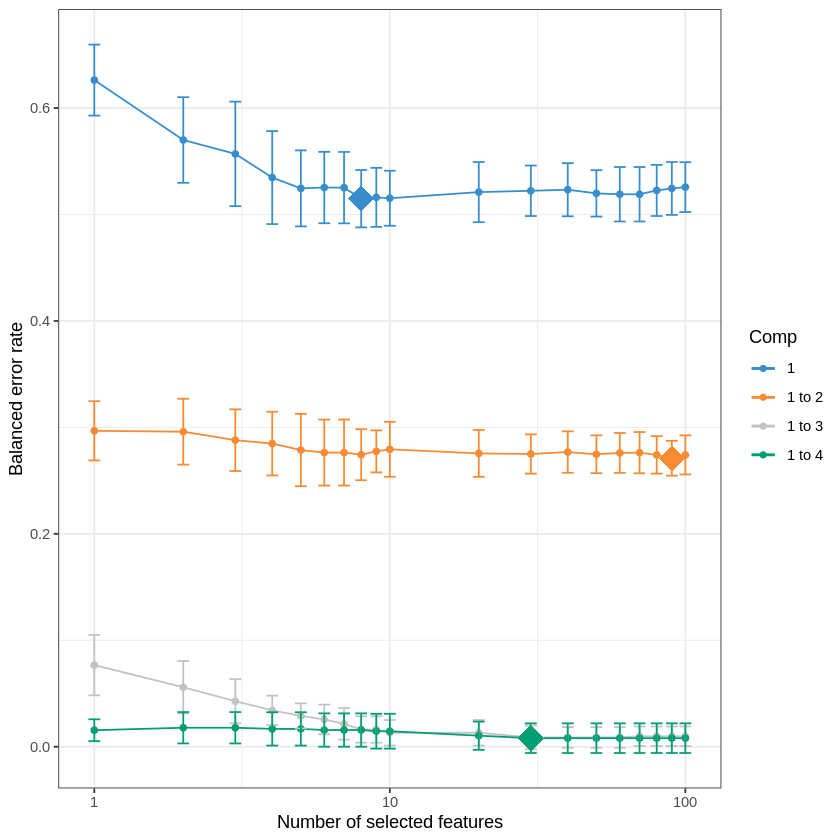

In [ ]:
plot(tune.splsda.srbct, sd = TRUE)

In [ ]:
tune.splsda.srbct$choice.ncomp$ncomp

[1] 3

In [ ]:
tune.splsda.srbct$choice.keepX

comp1 comp2 comp3 comp4 
    8    90    30    30

In [ ]:
ncomp <- tune.splsda.srbct$choice.ncomp$ncomp
ncomp

[1] 3

In [ ]:
select.keepX <- tune.splsda.srbct$choice.keepX[1:ncomp]
select.keepX

comp1 comp2 comp3 
    8    90    30

In [ ]:
splsda.srbct <- splsda(X, Y, ncomp = 3, keepX = select.keepX)

In [ ]:
set.seed(34)  # For reproducibility with this handbook, remove otherwise

perf.splsda.srbct <- perf(splsda.srbct, folds = 5, validation = "Mfold", 
                  dist = "max.dist", progressBar = TRUE, nrepeat = 10)

# perf.splsda.srbct  # Lists the different outputs
perf.splsda.srbct$error.rate


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%


$overall
        max.dist
comp1 0.43650794
comp2 0.21428571
comp3 0.01111111

$BER
        max.dist
comp1 0.52068841
comp2 0.28330616
comp3 0.01404891

In [ ]:
perf.splsda.srbct$error.rate.class

$max.dist
         comp1     comp2       comp3
EWS 0.02608696 0.0173913 0.008695652
BL  0.57500000 0.3625000 0.037500000
NB  0.91666667 0.6083333 0.000000000
RMS 0.56500000 0.1450000 0.010000000

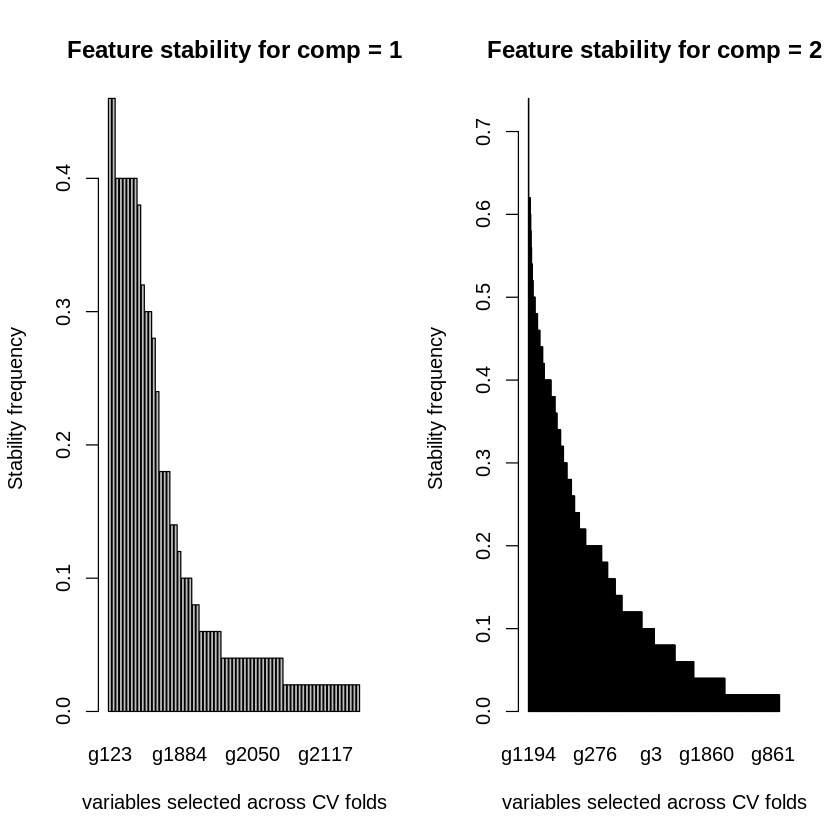

In [ ]:
par(mfrow=c(1,2))
# For component 1
stable.comp1 <- perf.splsda.srbct$features$stable$comp1
barplot(stable.comp1, xlab = 'variables selected across CV folds', 
        ylab = 'Stability frequency',
        main = 'Feature stability for comp = 1')

# For component 2
stable.comp2 <- perf.splsda.srbct$features$stable$comp2
barplot(stable.comp2, xlab = 'variables selected across CV folds', 
        ylab = 'Stability frequency',
        main = 'Feature stability for comp = 2')
par(mfrow=c(1,1))

In [ ]:
# First extract the name of selected var:
select.name <- selectVar(splsda.srbct, comp = 1)$name

# Then extract the stability values from perf:
stability <- perf.splsda.srbct$features$stable$comp1[select.name]

# Just the head of the stability of the selected var:
head(cbind(selectVar(splsda.srbct, comp = 1)$value, stability))

value.var Var1  Freq
g123  0.6638973 g123  0.46
g846  0.4518981 g846  0.46
g1606 0.3015015 g1606 0.30
g335  0.2953710 g335  0.30
g836  0.2568761 g836  0.40
g783  0.2110122 g783  0.24

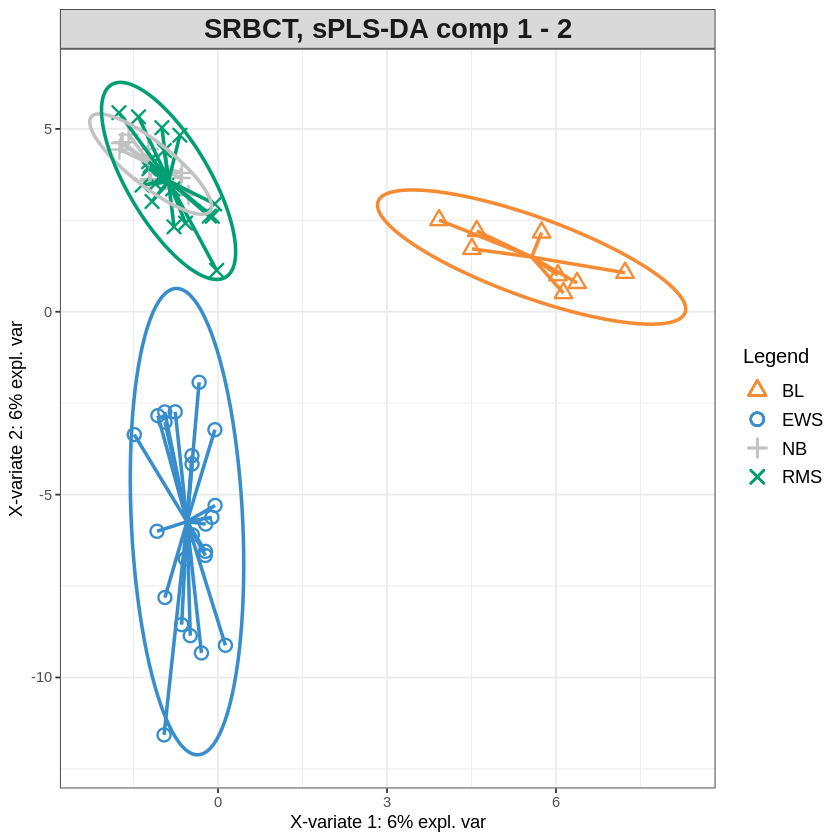

In [ ]:
plotIndiv(splsda.srbct, comp = c(1,2),
          ind.names = FALSE,
          ellipse = TRUE, legend = TRUE,
          star = TRUE,
          title = 'SRBCT, sPLS-DA comp 1 - 2')

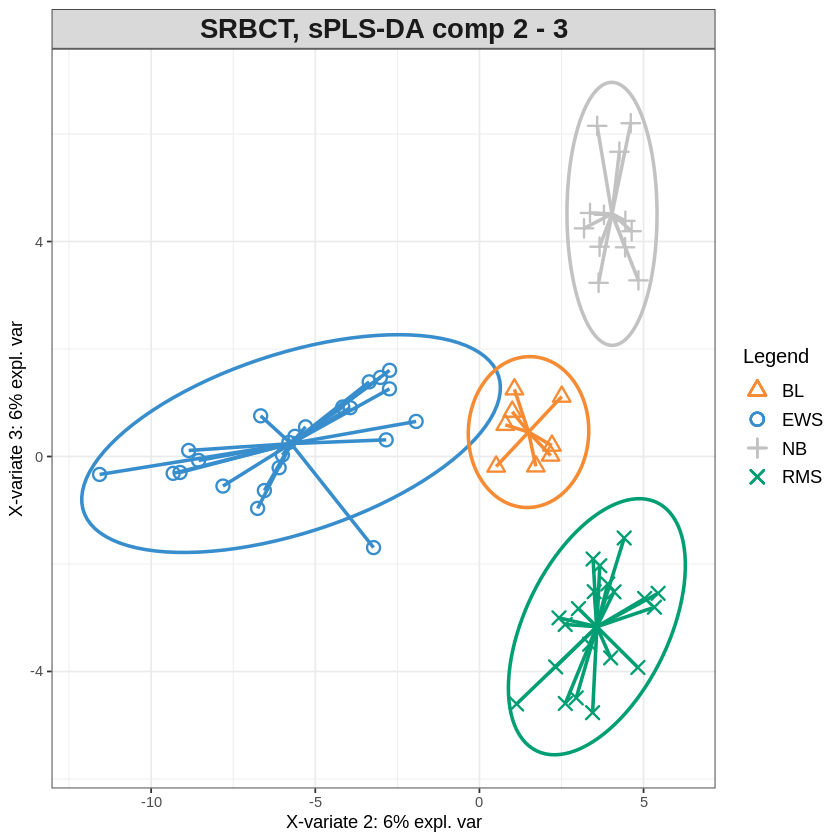

In [ ]:
plotIndiv(splsda.srbct, comp = c(2,3),
          ind.names = FALSE,
          ellipse = TRUE, legend = TRUE,
          star = TRUE,
          title = 'SRBCT, sPLS-DA comp 2 - 3')

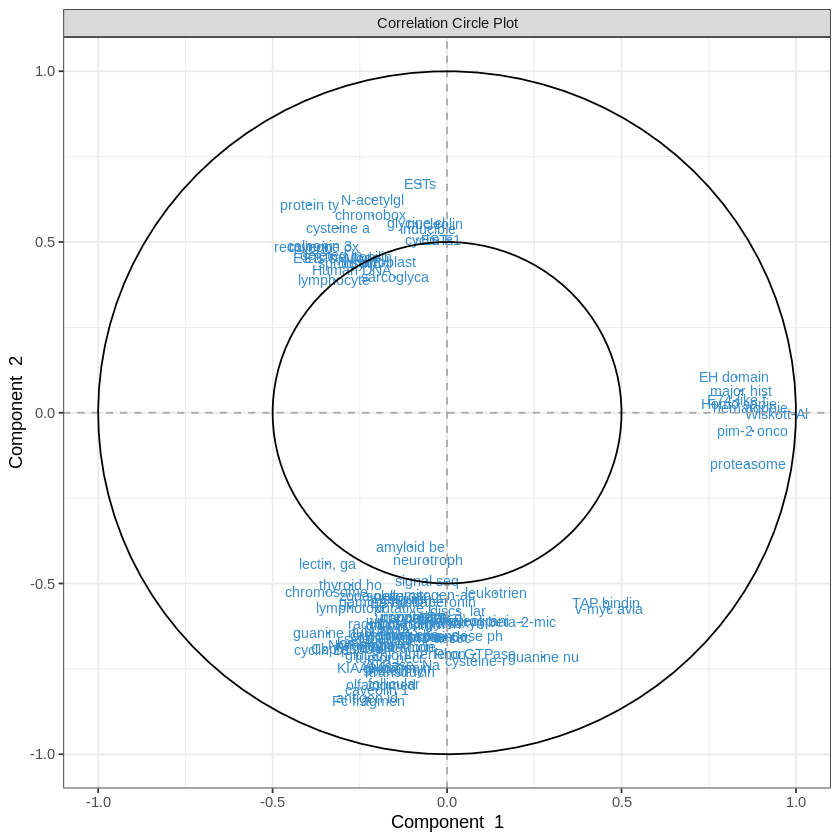

In [ ]:
var.name.short <- substr(srbct$gene.name[, 2], 1, 10)
plotVar(splsda.srbct, comp = c(1, 2), var.names = list(var.name.short), cex = 3)

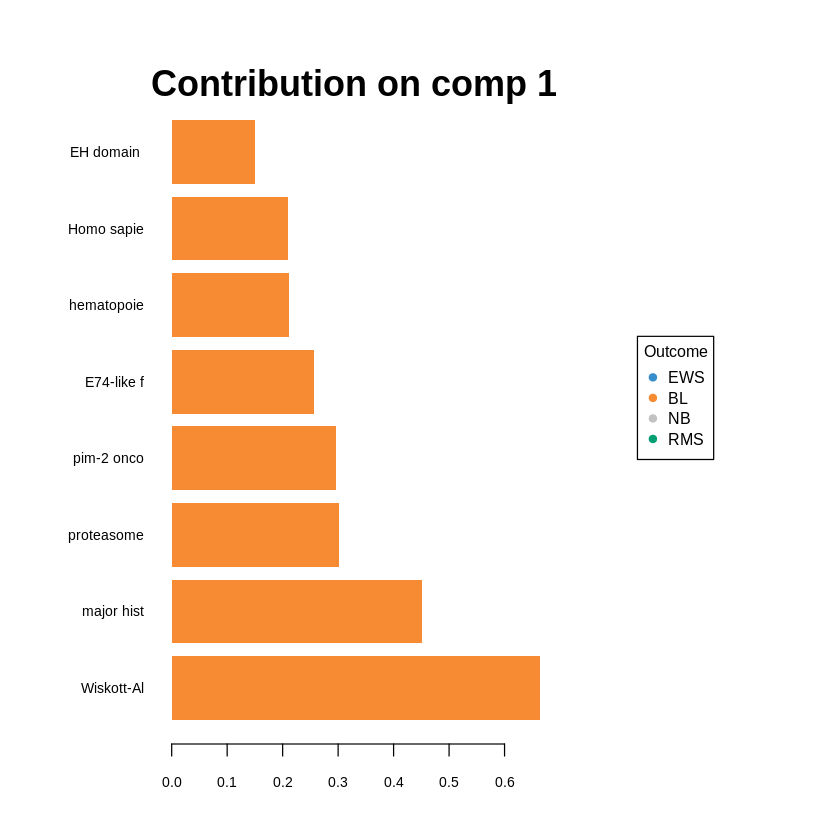

In [ ]:
plotLoadings(splsda.srbct, comp = 1, method = 'mean', contrib = 'max', 
             name.var = var.name.short)

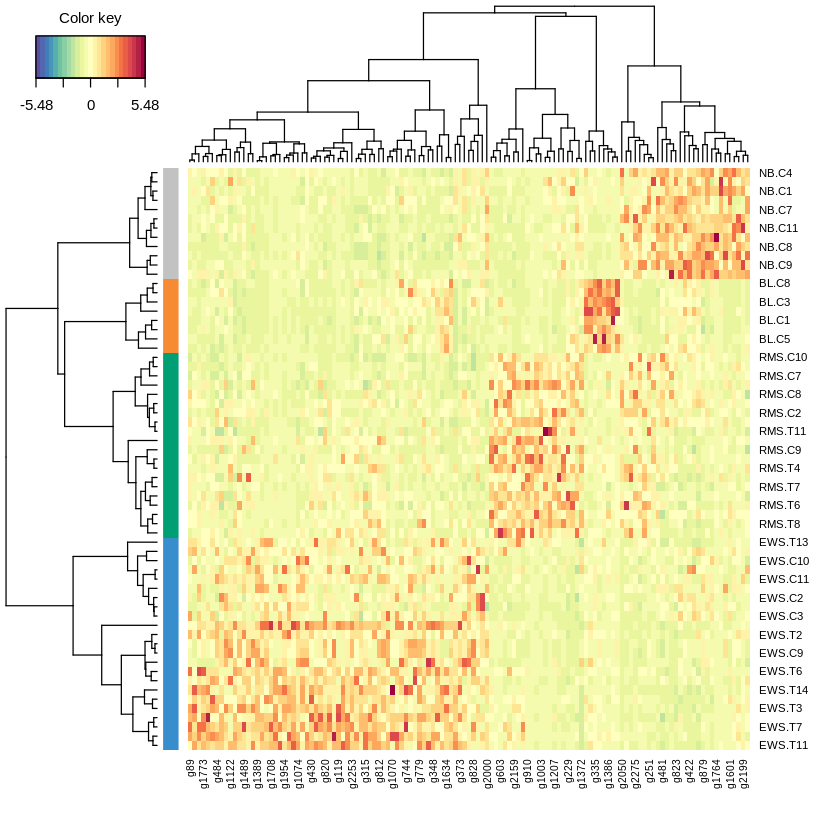

In [ ]:
cim(splsda.srbct, row.sideColors = color.mixo(Y))

In [ ]:
set.seed(33) # For reproducibility with this handbook, remove otherwise
train <- sample(1:nrow(X), 50)    # Randomly select 50 samples in training
test <- setdiff(1:nrow(X), train) # Rest is part of the test set

# Store matrices into training and test set:
X.train <- X[train, ]
X.test <- X[test,]
Y.train <- Y[train]
Y.test <- Y[test]

# Check dimensions are OK:
dim(X.train); dim(X.test)

[1]   50 2308

[1]   13 2308

In [ ]:
train.splsda.srbct <- splsda(X.train, Y.train, ncomp = 3, keepX = c(20,30,40))
predict.splsda.srbct <- predict(train.splsda.srbct, X.test, dist = 'mahalanobis.dist')

In [ ]:
head(data.frame(predict.splsda.srbct$class, Truth = Y.test))

mahalanobis.dist.comp1 mahalanobis.dist.comp2 mahalanobis.dist.comp3
EWS.T7  EWS                    EWS                    EWS                   
EWS.T15 EWS                    EWS                    EWS                   
EWS.C8  EWS                    EWS                    EWS                   
EWS.C10 EWS                    EWS                    EWS                   
BL.C8   BL                     BL                     BL                    
NB.C6   NB                     NB                     NB                    
        Truth
EWS.T7  EWS  
EWS.T15 EWS  
EWS.C8  EWS  
EWS.C10 EWS  
BL.C8   BL   
NB.C6   NB

In [ ]:
# Compare prediction on the second component and change as factor
predict.comp2 <- predict.splsda.srbct$class$mahalanobis.dist[,2]
table(factor(predict.comp2, levels = levels(Y)), Y.test)

     Y.test
      EWS BL NB RMS
  EWS   4  0  0   0
  BL    0  1  0   0
  NB    0  0  1   1
  RMS   0  0  0   6

In [ ]:
# Compare prediction on the third component and change as factor
predict.comp3 <- predict.splsda.srbct$class$mahalanobis.dist[,3]
table(factor(predict.comp3, levels = levels(Y)), Y.test)

     Y.test
      EWS BL NB RMS
  EWS   4  0  0   0
  BL    0  1  0   0
  NB    0  0  1   0
  RMS   0  0  0   7

In [ ]:
head(predict.splsda.srbct$predict[, , 3])

EWS        BL          NB          RMS         
EWS.T7  1.26848551 -0.05273773 -0.24070902  0.024961232
EWS.T15 1.15058424 -0.02222145 -0.11877994 -0.009582845
EWS.C8  1.25628411  0.05481026 -0.16500118 -0.146093198
EWS.C10 0.83995956  0.10871106  0.16452934 -0.113199949
BL.C8   0.02431262  0.90877176  0.01775304  0.049162580
NB.C6   0.06738230  0.05086884  0.86247360  0.019275265

$Comp1
                   AUC   p-value
EWS vs Other(s) 0.3902 1.493e-01
BL vs Other(s)  1.0000 5.586e-06
NB vs Other(s)  0.8105 8.821e-04
RMS vs Other(s) 0.6523 5.308e-02

$Comp2
                   AUC   p-value
EWS vs Other(s) 1.0000 5.135e-11
BL vs Other(s)  1.0000 5.586e-06
NB vs Other(s)  0.8627 1.020e-04
RMS vs Other(s) 0.8140 6.699e-05

$Comp3
                AUC   p-value
EWS vs Other(s)   1 5.135e-11
BL vs Other(s)    1 5.586e-06
NB vs Other(s)    1 8.505e-08
RMS vs Other(s)   1 2.164e-10



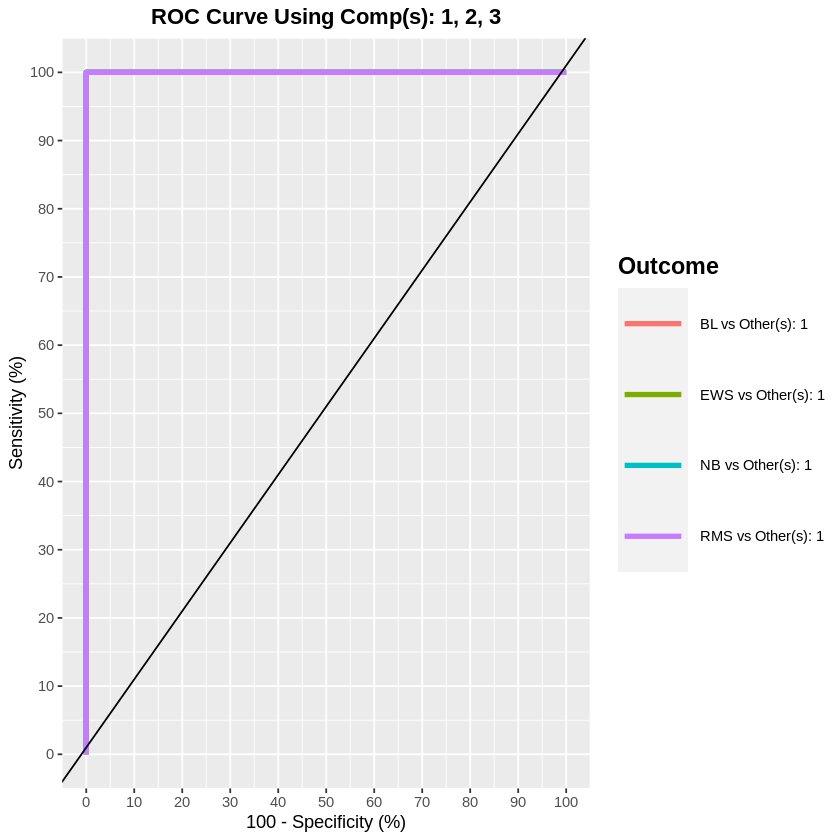

In [ ]:
aus.srbct <- auroc(splsda.srbct)

# 4. Block PLS-DA on the TCGA study

In [5]:
library(mixOmics)
data(breast.TCGA)

X <- list(mRNA = breast.TCGA$data.train$mrna,
          miRNA = breast.TCGA$data.train$mirna,
          protein = breast.TCGA$data.train$protein)

Y <- breast.TCGA$data.train$subtype
summary(Y)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.17.29
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




Basal  Her2  LumA 
   45    30    75

In [6]:
design <- matrix(0.1, ncol = length(X), nrow = length(X), dimnames = list(names(X), names(X)))
diag(design) <- 0

In [7]:
design

mRNA miRNA protein
mRNA    0.0  0.1   0.1    
miRNA   0.1  0.0   0.1    
protein 0.1  0.1   0.0

In [8]:
res1.pls.tcga <- pls(X$mRNA, X$protein, ncomp = 1)
cor(res1.pls.tcga$variates$X, res1.pls.tcga$variates$Y)

res2.pls.tcga <- pls(X$mRNA, X$miRNA, ncomp = 1)
cor(res2.pls.tcga$variates$X, res2.pls.tcga$variates$Y)

res3.pls.tcga <- pls(X$protein, X$miRNA, ncomp = 1)
cor(res3.pls.tcga$variates$X, res3.pls.tcga$variates$Y)

comp1    
comp1 0.9031761

comp1    
comp1 0.8456299

comp1    
comp1 0.7982008

Design matrix has changed to include Y; each block will be
            linked to Y.



$mRNA
        max.dist centroids.dist mahalanobis.dist
comp1 0.20000000     0.10400000       0.10400000
comp2 0.03800000     0.03200000       0.03666667
comp3 0.03000000     0.02533333       0.03466667
comp4 0.02533333     0.02933333       0.03066667
comp5 0.02933333     0.02600000       0.02533333

$miRNA
       max.dist centroids.dist mahalanobis.dist
comp1 0.2406667      0.2280000        0.2280000
comp2 0.1413333      0.1446667        0.1306667
comp3 0.1260000      0.1360000        0.1053333
comp4 0.1226667      0.1380000        0.1046667
comp5 0.1100000      0.1306667        0.1060000

$protein
        max.dist centroids.dist mahalanobis.dist
comp1 0.22066667     0.17400000       0.17400000
comp2 0.09466667     0.08533333       0.09200000
comp3 0.08866667     0.08600000       0.07600000
comp4 0.06933333     0.08600000       0.07466667
comp5 0.07866667     0.08600000       0.06733333

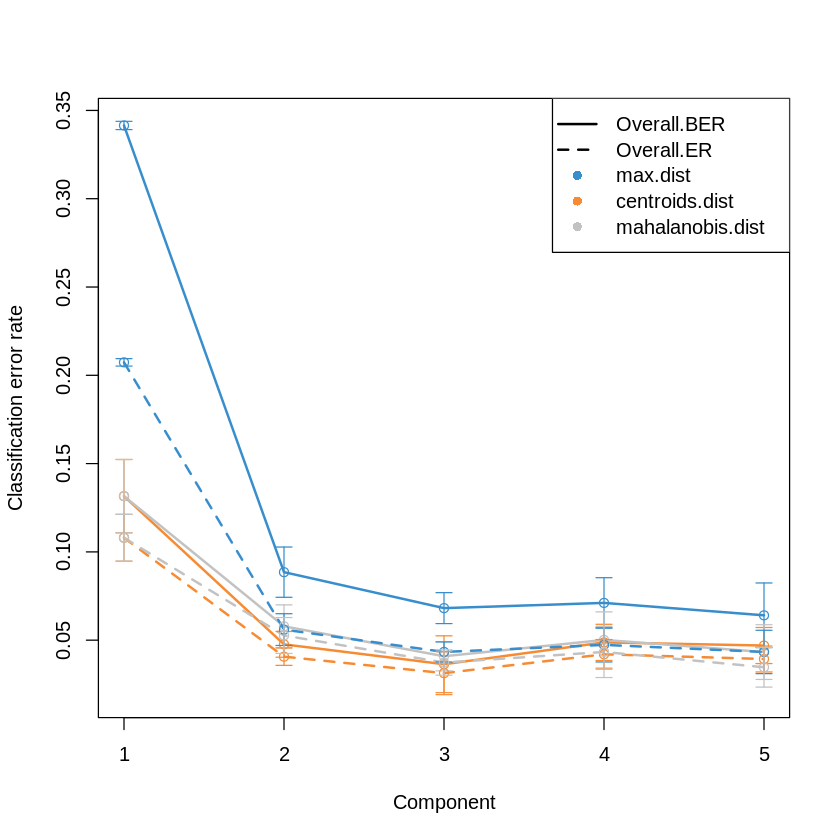

In [9]:
diablo.tcga <- block.plsda(X, Y, ncomp = 5, design= design)

set.seed(123)
perf.diablo.tcga = perf(diablo.tcga, validation = 'Mfold', folds = 10, nrepeat = 10)

perf.diablo.tcga$error.rate

plot(perf.diablo.tcga)

In [10]:
perf.diablo.tcga$choice.ncomp$WeightedVote

max.dist centroids.dist mahalanobis.dist
Overall.ER  3        2              3               
Overall.BER 3        2              3

In [11]:
ncomp <- perf.diablo.tcga$choice.ncomp$WeightedVote["Overall.BER", "centroids.dist"]

In [12]:
# This code may take several min to run, parallelisation is possible
set.seed(123) # For reproducibility with this handbook, remove otherwise
test.keepX <- list(mRNA = c(5:9, seq(10, 25, 5)),
                   miRNA = c(5:9, seq(10, 20, 2)),
                   proteomics = c(seq(5, 25, 5)))

tune.diablo.tcga <- tune.block.splsda(X, Y, ncomp = 2, 
                              test.keepX = test.keepX, design = design,
                              validation = 'Mfold', folds = 10, nrepeat = 1, 
                              dist = "centroids.dist")

Design matrix has changed to include Y; each block will be
            linked to Y.


You have provided a sequence of keepX of length:  9 for block mRNA and 11 for block miRNA and  5 for block proteomics.
This results in 495 models being fitted for each component and each nrepeat, this may take some time to run, be patient!


You can look into the 'BPPARAM' argument to speed up computation time.



In [13]:
list.keepX <- tune.diablo.tcga$choice.keepX
list.keepX

$mRNA
[1]  8 25

$miRNA
[1] 14  5

$protein
[1] 10  5

In [14]:
diablo.tcga <- block.splsda(X, Y, ncomp = ncomp, keepX = list.keepX, design = design)

Design matrix has changed to include Y; each block will be
            linked to Y.



In [15]:
diablo.tcga$design

mRNA miRNA protein Y
mRNA    0.0  0.1   0.1     1
miRNA   0.1  0.0   0.1     1
protein 0.1  0.1   0.0     1
Y       1.0  1.0   1.0     0

In [16]:
selectVar(diablo.tcga, block = 'mRNA', comp = 1)

$mRNA
$mRNA$name
[1] "ZNF552"  "KDM4B"   "CCNA2"   "LRIG1"   "PREX1"   "FUT8"    "C4orf34"
[8] "TTC39A" 

$mRNA$value
         value.var
ZNF552  -0.6370880
KDM4B   -0.4799214
CCNA2    0.3081912
LRIG1   -0.2860655
PREX1   -0.2696447
FUT8    -0.2199015
C4orf34 -0.1876363
TTC39A  -0.1752336


$comp
[1] 1

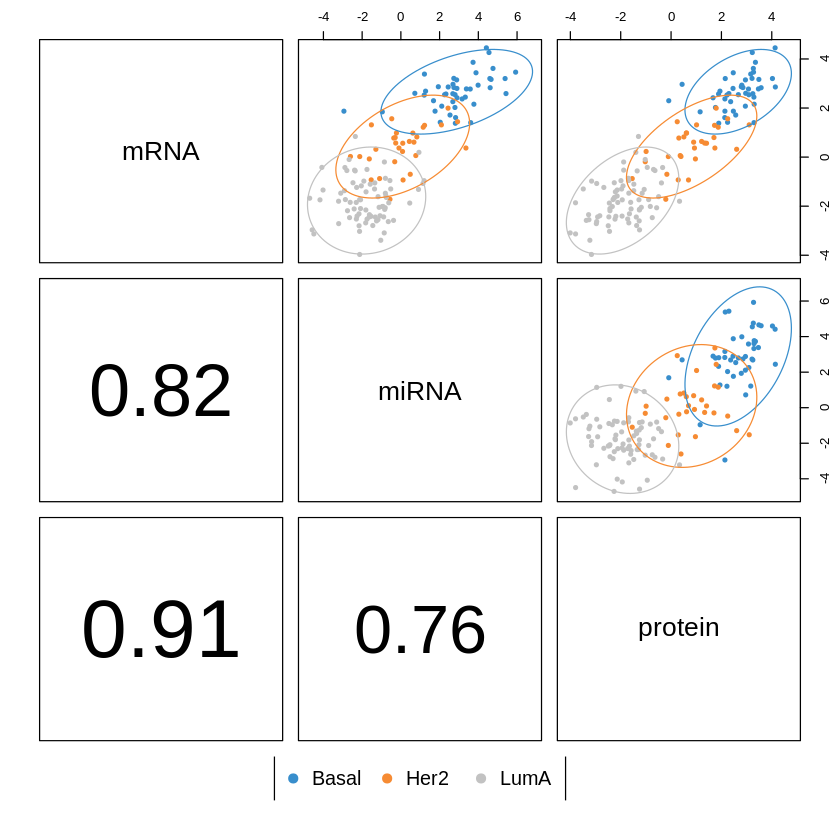

In [17]:
plotDiablo(diablo.tcga, ncomp = 1)

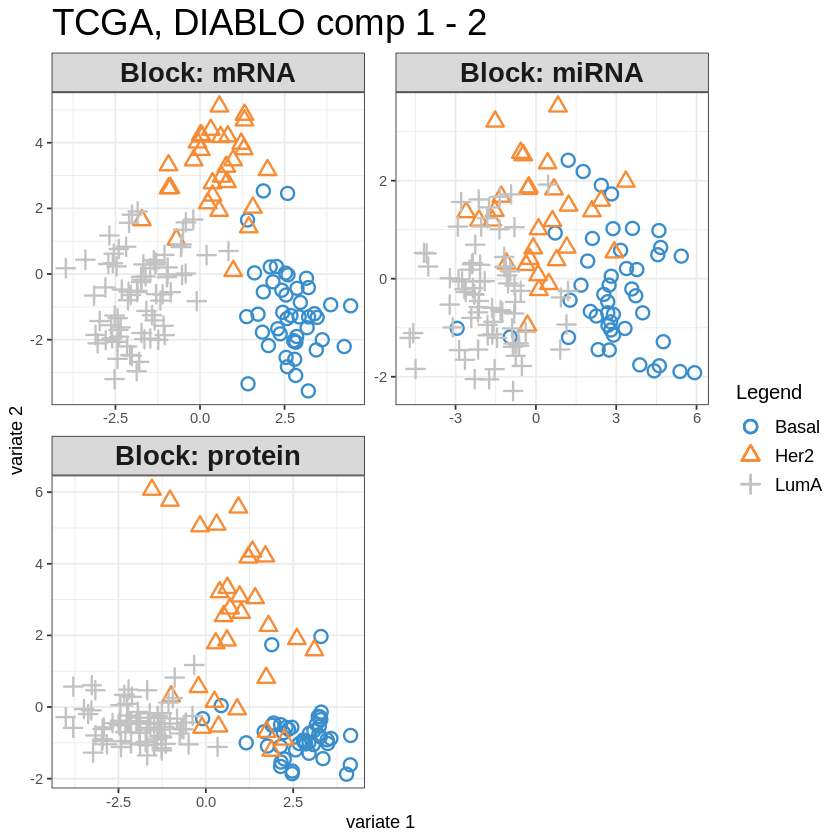

In [18]:
plotIndiv(diablo.tcga, ind.names = FALSE, legend = TRUE, title = 'TCGA, DIABLO comp 1 - 2')

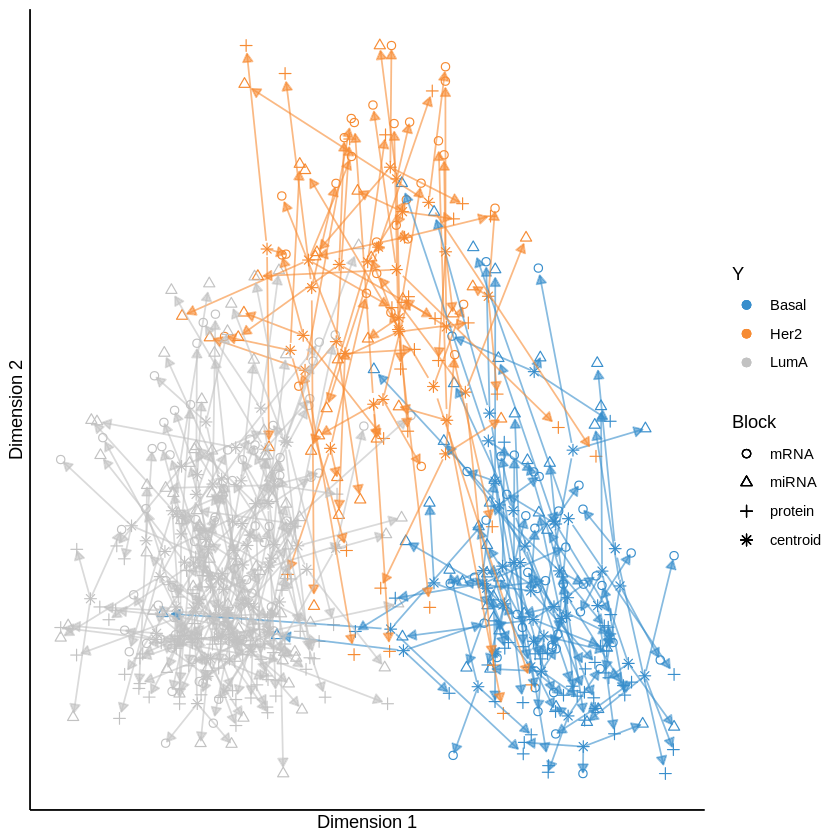

In [19]:
plotArrow(diablo.tcga, ind.names = FALSE, legend = TRUE, title = 'TCGA, DIABLO comp 1 - 2')

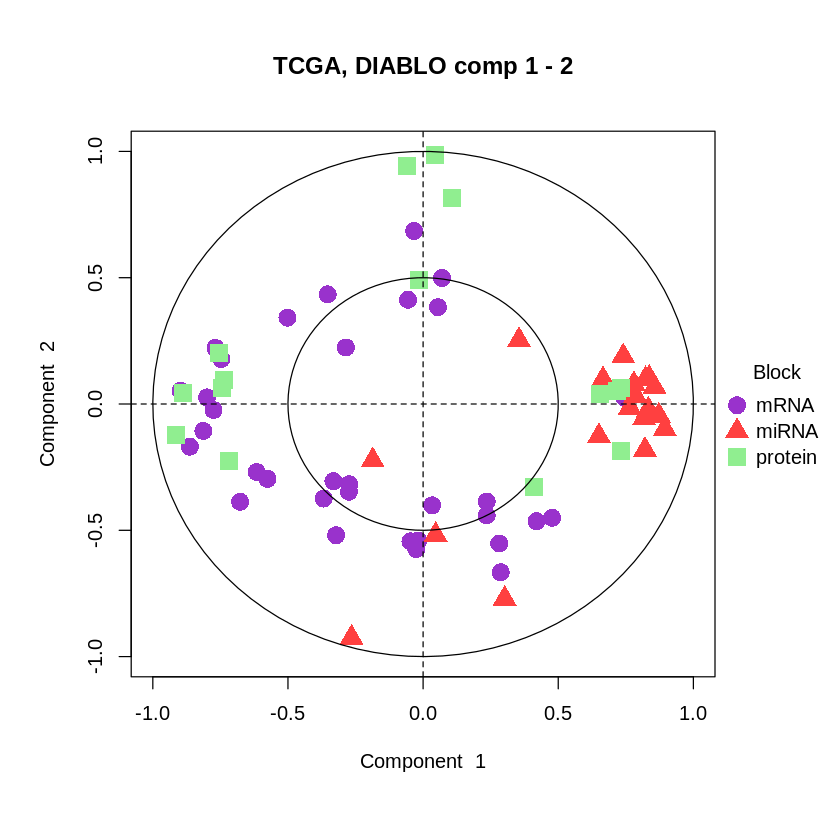

In [20]:
plotVar(diablo.tcga, var.names = FALSE, style = 'graphics', legend = TRUE, 
        pch = c(16, 17, 15), cex = c(2,2,2), 
        col = c('darkorchid', 'brown1', 'lightgreen'),
        title = 'TCGA, DIABLO comp 1 - 2')

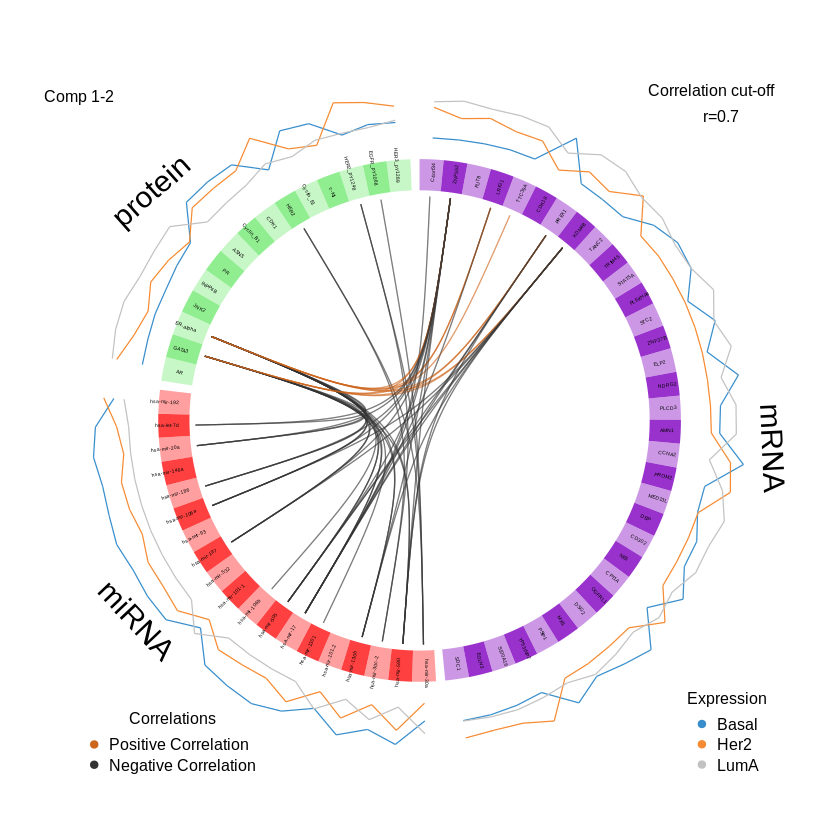

In [21]:
circosPlot(diablo.tcga, cutoff = 0.7, line = TRUE, 
          color.blocks = c('darkorchid', 'brown1', 'lightgreen'),
          color.cor = c('chocolate3', 'grey20'), size.labels = 1.5)

In [22]:
# X11()   # Opens a new window
network(diablo.tcga, blocks = c(1,2,3), 
        cutoff = 0.4,
        color.node = c('darkorchid', 'brown1', 'lightgreen'),
        # To save the plot, comment out otherwise
        save = 'png', name.save = 'diablo-network'
        )


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




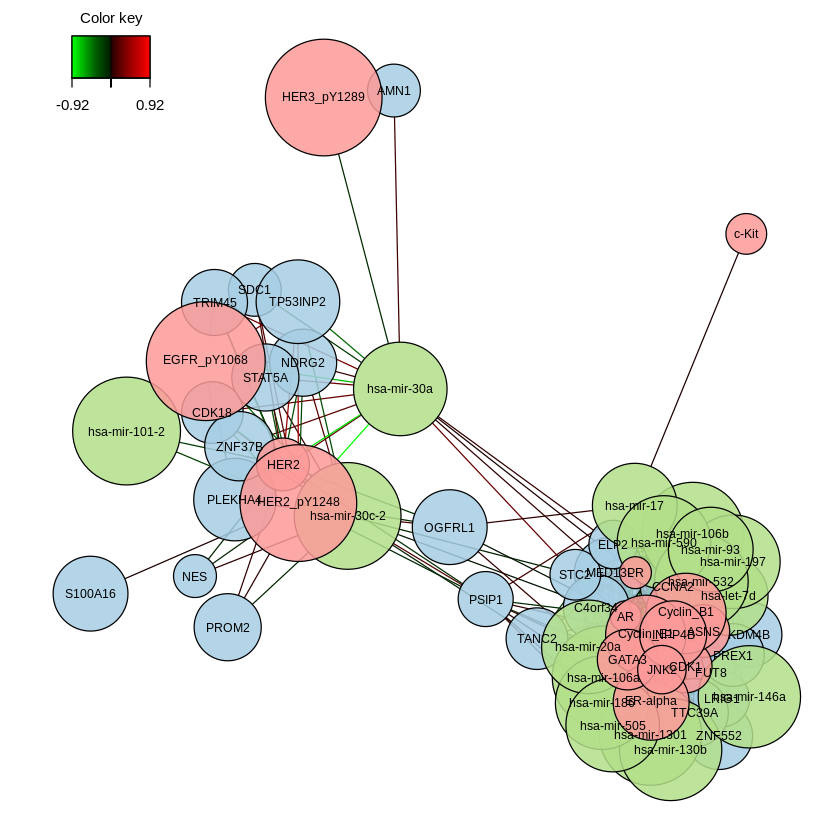

In [23]:
# Not run
library(igraph)
myNetwork <- network(diablo.tcga, blocks = c(1,2,3), cutoff = 0.4)
write.graph(myNetwork$gR, file = "myNetwork.gml", format = "gml")

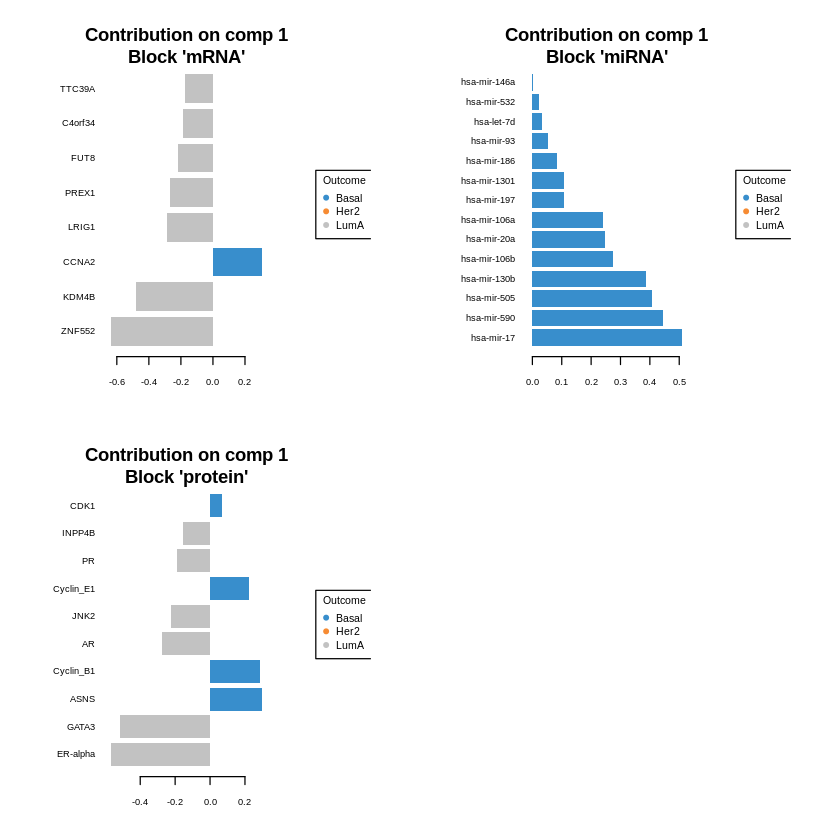

In [24]:
plotLoadings(diablo.tcga, comp = 1, contrib = 'max', method = 'median')


trimming values to [-3, 3] range for cim visualisation. See 'trim' arg in ?cimDiablo


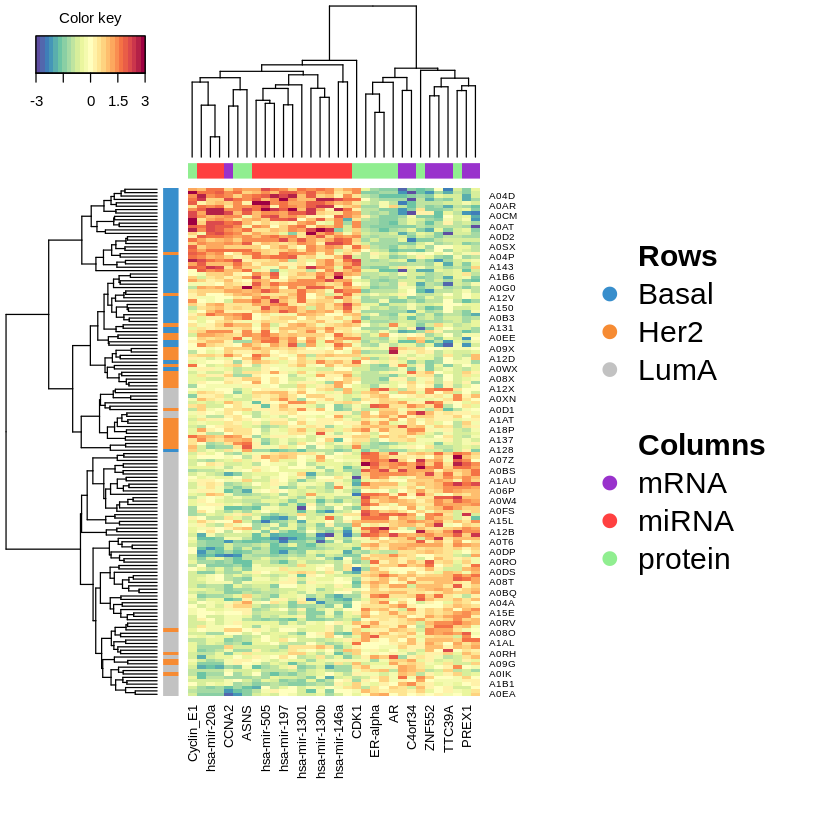

In [25]:
cimDiablo(diablo.tcga, color.blocks = c('darkorchid', 'brown1', 'lightgreen'),
          comp = 1, margin=c(8,20), legend.position = "right")

In [26]:
set.seed(123) # For reproducibility with this handbook, remove otherwise
perf.diablo.tcga <- perf(diablo.tcga,  validation = 'Mfold', folds = 10, 
                         nrepeat = 10, dist = 'centroids.dist')



In [27]:
perf.diablo.tcga  # Lists the different outputs


Call:
 perf.sgccda(object = diablo.tcga, dist = "centroids.dist", validation = "Mfold", folds = 10, nrepeat = 10) 

 Main numerical outputs: 
 -------------------- 
 Error rate (overall or BER) for each component and for each distance: see object$error.rate 
 Error rate per class, for each component and for each distance: see object$error.rate.class 
 Prediction values for each component: see object$predict 
 Classification of each sample, for each component and for each distance: see object$class 
 Stable features on each component: see object$features$stable 
 AUC values: see object$auc if auc = TRUE 

 Visualisation Functions: 
 -------------------- 
 plot 

In [28]:
perf.diablo.tcga$MajorityVote.error.rate

$centroids.dist
                 comp1      comp2
Basal       0.02666667 0.04444444
Her2        0.20666667 0.12333333
LumA        0.04533333 0.00800000
Overall.ER  0.07200000 0.04200000
Overall.BER 0.09288889 0.05859259

In [29]:
perf.diablo.tcga$WeightedVote.error.rate

$centroids.dist
                  comp1      comp2
Basal       0.006666667 0.04444444
Her2        0.140000000 0.10666667
LumA        0.045333333 0.00800000
Overall.ER  0.052666667 0.03866667
Overall.BER 0.064000000 0.05303704

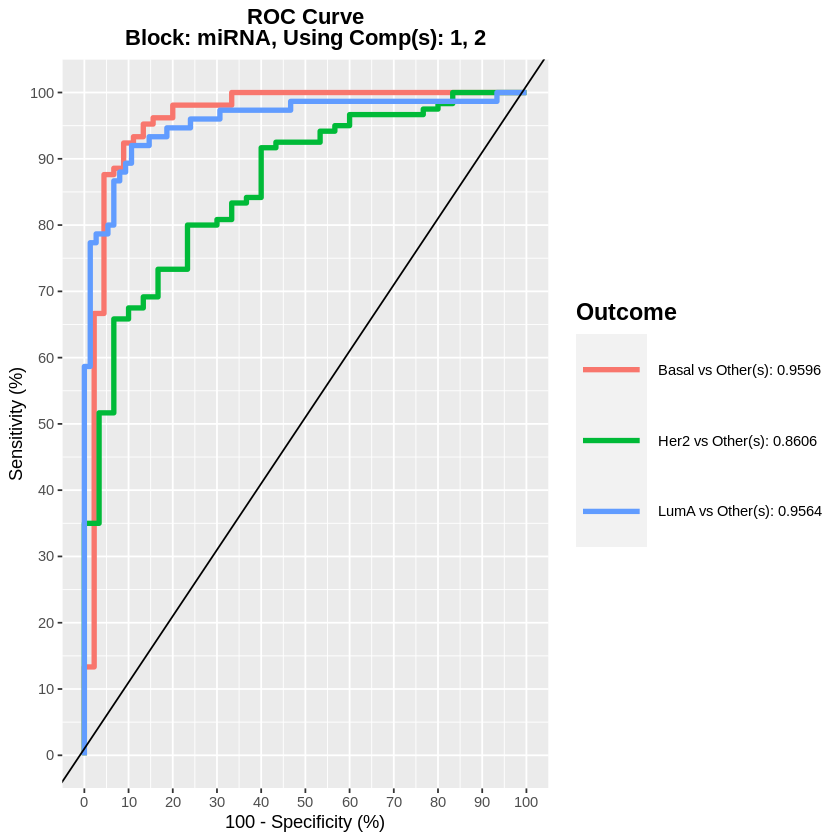

In [30]:
auc.diablo.tcga <- auroc(diablo.tcga, roc.block = 'miRNA', roc.comp = 2, print = FALSE)

In [31]:
# Prepare test set data: here one block (proteins) is missing
data.test.tcga <- list(mRNA = breast.TCGA$data.test$mrna, 
                      miRNA = breast.TCGA$data.test$mirna)

predict.diablo.tcga <- predict(diablo.tcga, newdata = data.test.tcga)
# The warning message will inform us that one block is missing

#predict.diablo # List the different outputs

Warning message in predict.block.spls(diablo.tcga, newdata = data.test.tcga):
“Some blocks are missing in 'newdata'; the prediction is based on the following blocks only: mRNA, miRNA”


In [32]:
confusion.mat.tcga <- get.confusion_matrix(truth = breast.TCGA$data.test$subtype, 
                     predicted = predict.diablo.tcga$WeightedVote$centroids.dist[,2])
confusion.mat.tcga

predicted.as.Basal predicted.as.Her2 predicted.as.LumA
Basal 20                  1                 0               
Her2   0                 13                 1               
LumA   0                  3                32

In [33]:
get.BER(confusion.mat.tcga)

[1] 0.06825397

# 5. MINT on the stem cell case study

In [34]:
data(stemcells)

X <- stemcells$gene
dim(X)

Y <- stemcells$celltype
length(Y)

[1] 125 400

[1] 125

In [35]:
summary(Y)

Fibroblast       hESC      hiPSC 
        30         37         58

In [36]:
study <- stemcells$study
summary(study)

1  2  3  4 
38 51 21 15

In [37]:
table(Y, study)

            study
Y             1  2  3  4
  Fibroblast  6 18  3  3
  hESC       20  3  8  6
  hiPSC      12 30 10  6

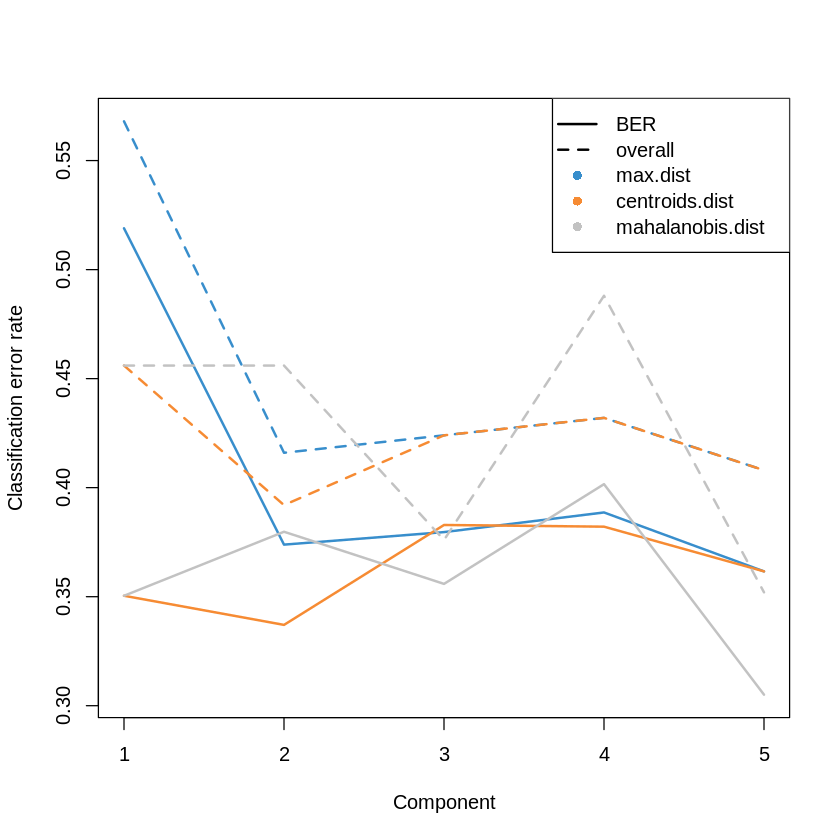

In [38]:
mint.plsda.stem <- mint.plsda(X = X, Y = Y, study = study, ncomp = 5)

set.seed(2543)
perf.mint.plsda.stem <- perf(mint.plsda.stem)

plot(perf.mint.plsda.stem)

In [39]:
perf.mint.plsda.stem$global.error$BER

max.dist  centroids.dist mahalanobis.dist
comp1 0.5189500 0.3504194      0.3504194       
comp2 0.3738739 0.3370612      0.3797763       
comp3 0.3796210 0.3828829      0.3558662       
comp4 0.3886300 0.3821062      0.4016051       
comp5 0.3616030 0.3616030      0.3050637

In [40]:
perf.mint.plsda.stem$global.error

$BER
       max.dist centroids.dist mahalanobis.dist
comp1 0.5189500      0.3504194        0.3504194
comp2 0.3738739      0.3370612        0.3797763
comp3 0.3796210      0.3828829        0.3558662
comp4 0.3886300      0.3821062        0.4016051
comp5 0.3616030      0.3616030        0.3050637

$overall
      max.dist centroids.dist mahalanobis.dist
comp1    0.568          0.456            0.456
comp2    0.416          0.392            0.456
comp3    0.424          0.424            0.376
comp4    0.432          0.432            0.488
comp5    0.408          0.408            0.352

$error.rate.class
$error.rate.class$max.dist
               comp1     comp2     comp3     comp4     comp5
Fibroblast 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
hESC       0.9189189 0.6216216 0.6216216 0.6486486 0.5675676
hiPSC      0.6379310 0.5000000 0.5172414 0.5172414 0.5172414

$error.rate.class$centroids.dist
               comp1     comp2     comp3     comp4     comp5
Fibroblast 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
hESC       0.1891892 0.4594595 0.6486486 0.5945946 0.5675676
hiPSC      0.8620690 0.5517241 0.5000000 0.5517241 0.5172414

$error.rate.class$mahalanobis.dist
               comp1     comp2      comp3      comp4     comp5
Fibroblast 0.0000000 0.0000000 0.06666667 0.03333333 0.0000000
hESC       0.1891892 0.4324324 0.62162162 0.37837838 0.4324324
hiPSC      0.8620690 0.7068966 0.37931034 0.79310345 0.4827586

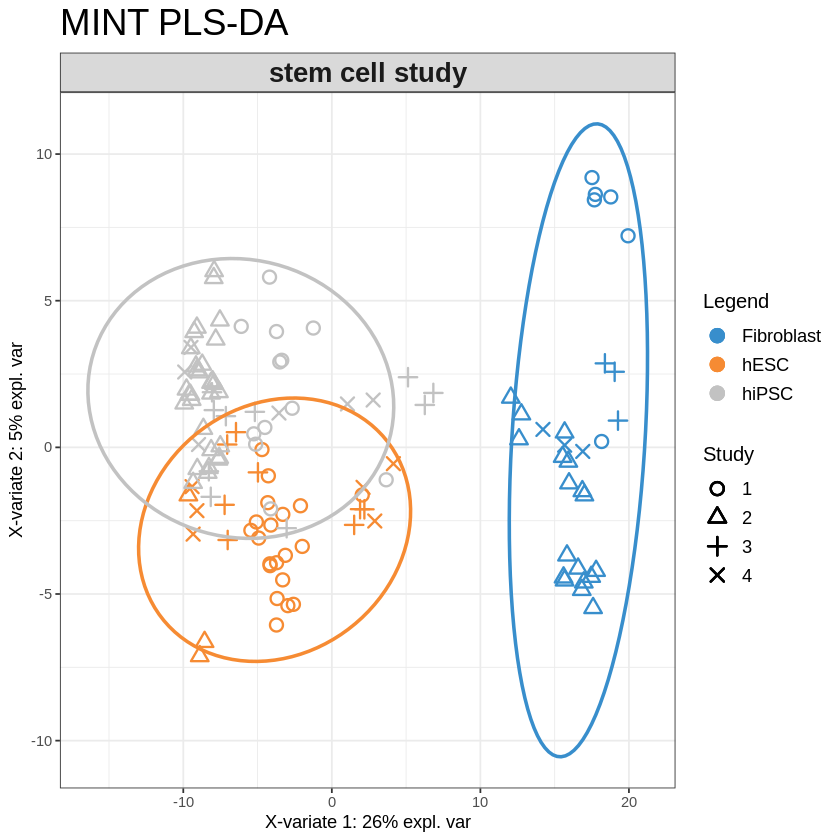

In [41]:
final.mint.plsda.stem <- mint.plsda(X = X, Y = Y, study = study, ncomp = 2)

plotIndiv(final.mint.plsda.stem, legend = TRUE, title = 'MINT PLS-DA',
          subtitle = 'stem cell study', ellipse = T)

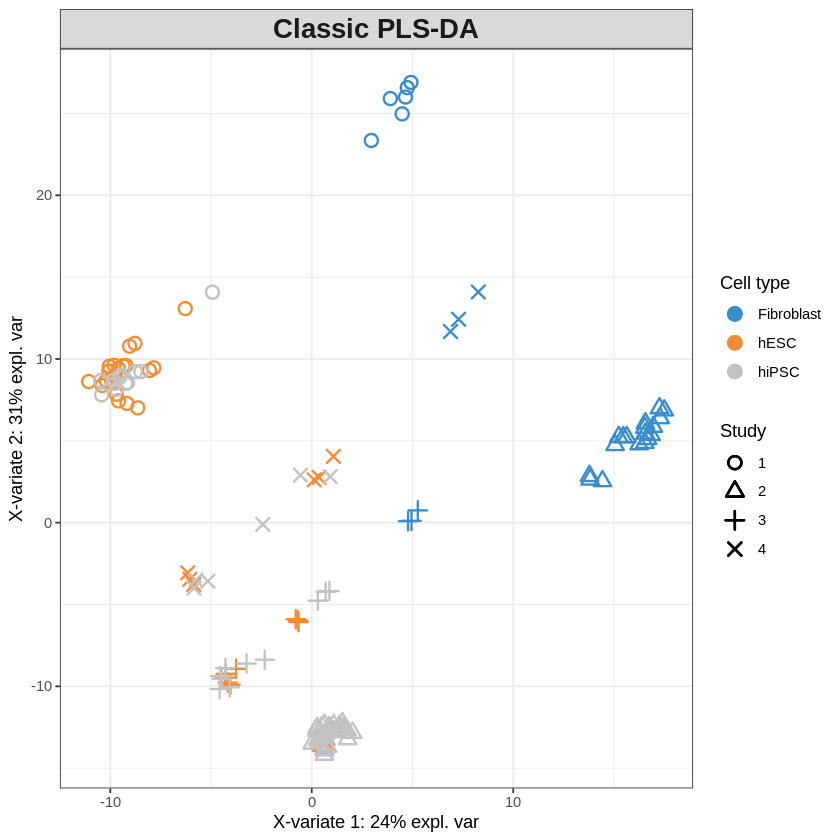

In [42]:
plsda.stem <- plsda(X = X, Y = Y, ncomp = 2)

plotIndiv(plsda.stem, pch = study,
          legend = TRUE, title = 'Classic PLS-DA',
          legend.title = 'Cell type', legend.title.pch = 'Study')

In [43]:
set.seed(2543)  # For a reproducible result here, remove for your own analyses
tune.mint.splsda.stem <- tune(X = X, Y = Y, study = study, 
                 ncomp = 2, test.keepX = seq(1, 100, 1),
                 method = 'mint.splsda', #Specify the method
                 measure = 'BER',
                 dist = "centroids.dist")

#tune.mint.splsda.stem # Lists the different types of outputs

# Mean error rate per component and per tested keepX value:
#tune.mint.splsda.stem$error.rate[1:5,]

Calling 'tune.mint.splsda' with Leave-One-Group-Out Cross Validation (nrepeat = 1)



In [44]:
tune.mint.splsda.stem$choice.keepX

comp1 comp2 
   24    45

In [45]:
plot(tune.mint.splsda.stem)

sd bars cannot be calculated when nrepeat = 1.




ERROR: ignored

In [46]:
final.mint.splsda.stem <- mint.splsda(X = X, Y = Y, study = study, ncomp = 2,  
                              keepX = tune.mint.splsda.stem$choice.keepX)

#mint.splsda.stem.final # Lists useful functions that can be used with a MINT object

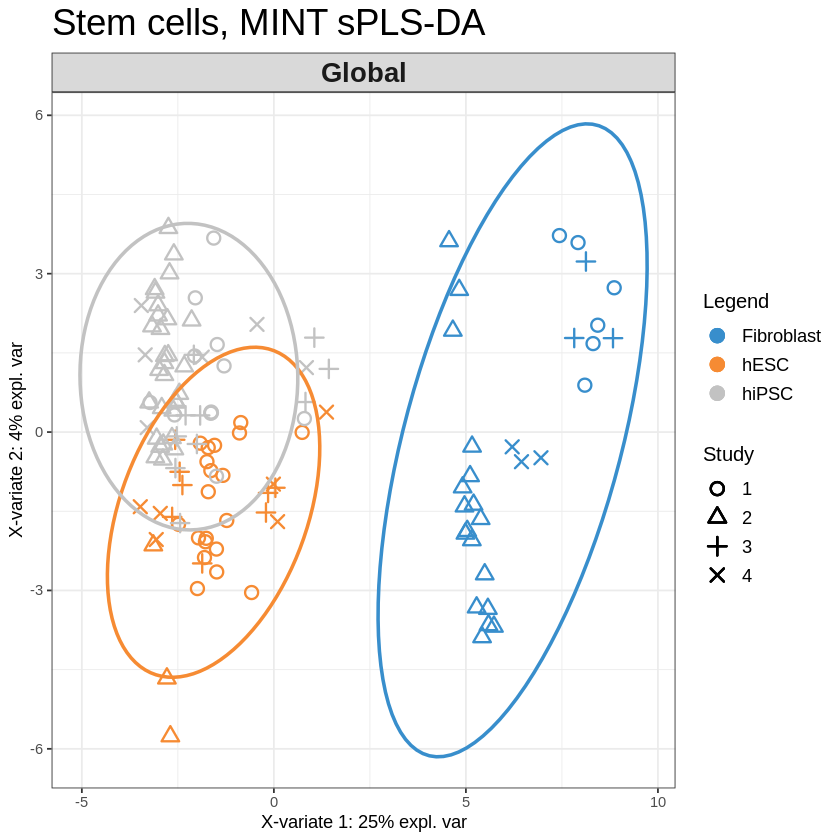

In [47]:
plotIndiv(final.mint.splsda.stem, study = 'global', legend = TRUE, 
          title = 'Stem cells, MINT sPLS-DA', 
          subtitle = 'Global', ellipse = T)

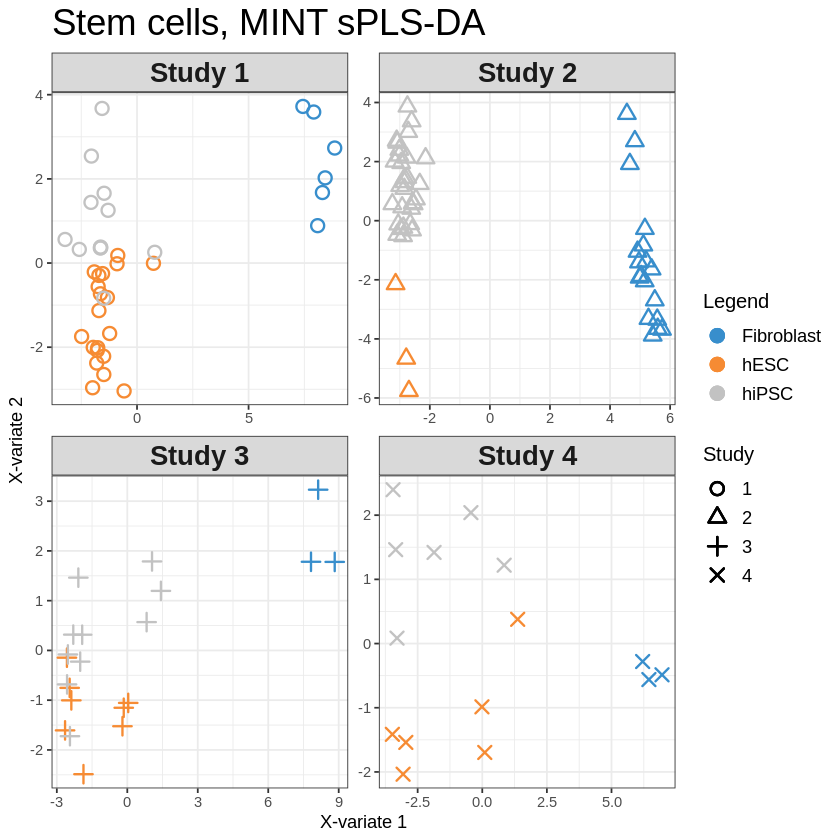

In [48]:
plotIndiv(final.mint.splsda.stem, study = 'all.partial', legend = TRUE, 
          title = 'Stem cells, MINT sPLS-DA', 
          subtitle = paste("Study",1:4))

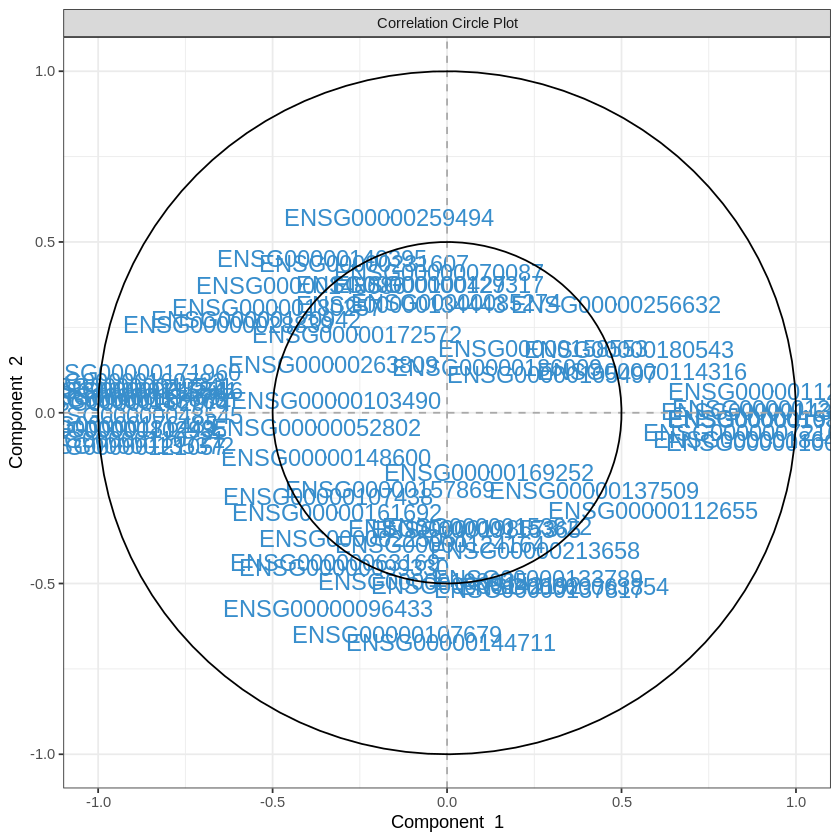

In [49]:
plotVar(final.mint.splsda.stem)

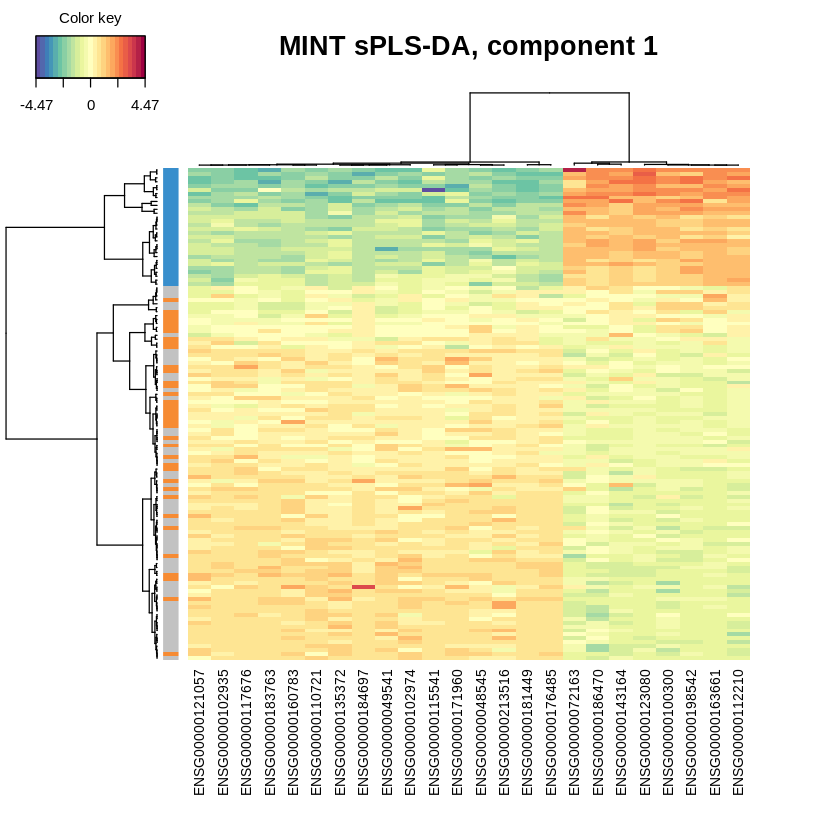

In [50]:
# If facing margin issues, use either X11() or save the plot using the
# arguments save and name.save
cim(final.mint.splsda.stem, comp = 1, margins=c(10,5), 
    row.sideColors = color.mixo(as.numeric(Y)), row.names = FALSE,
    title = "MINT sPLS-DA, component 1")

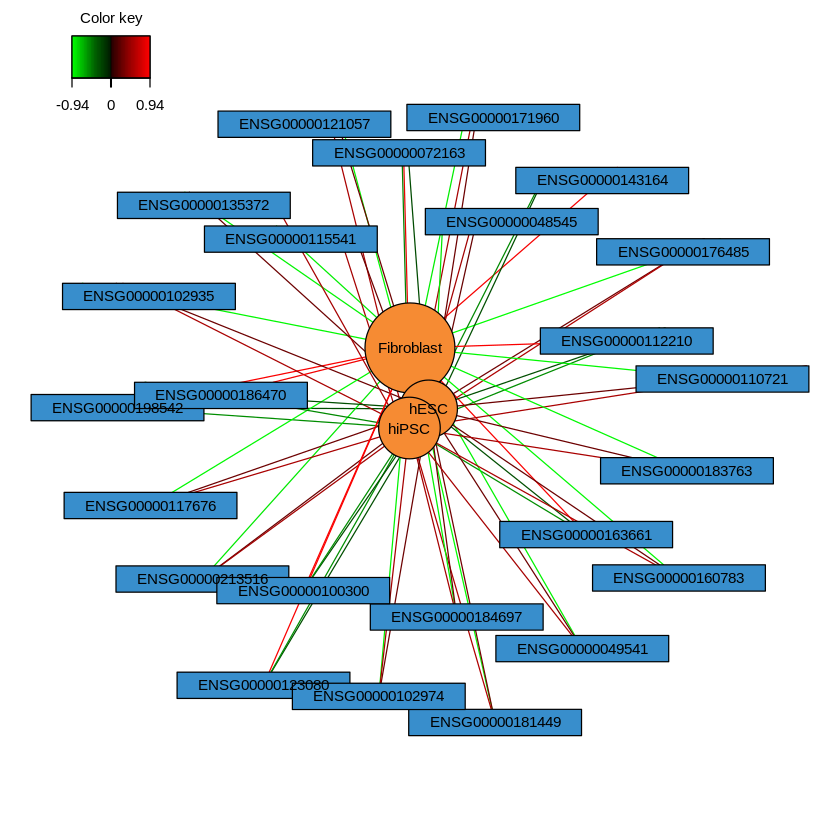

In [51]:
# If facing margin issues, use either X11() or save the plot using the
# arguments save and name.save
network(final.mint.splsda.stem, comp = 1,
        color.node = c(color.mixo(1), color.mixo(2)), 
        shape.node = c("rectangle", "circle"))

In [52]:
head(selectVar(final.mint.splsda.stem, comp = 1)$value)

value.var 
ENSG00000181449 -0.4449871
ENSG00000123080  0.3760240
ENSG00000110721 -0.3669994
ENSG00000176485 -0.3048097
ENSG00000184697 -0.2696120
ENSG00000102935 -0.2648668

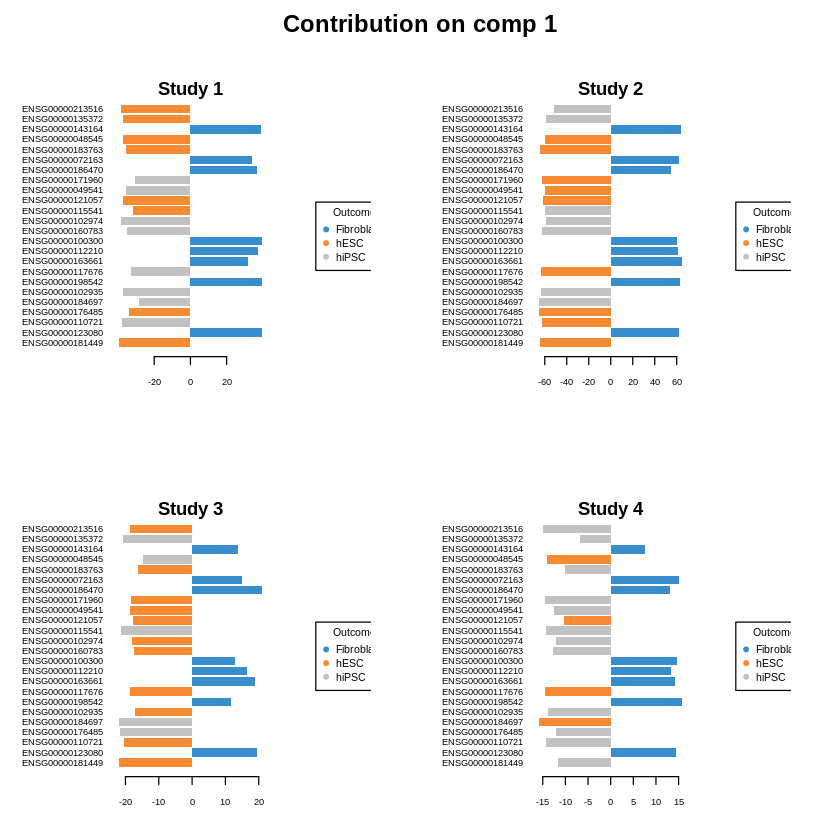

In [53]:
plotLoadings(final.mint.splsda.stem, contrib = "max", method = 'mean', comp=1, 
             study="all.partial", title="Contribution on comp 1", 
             subtitle = paste("Study",1:4))

In [54]:
set.seed(123)  # For reproducible results here, remove for your own study
perf.mint.splsda.stem.final <- perf(final.mint.plsda.stem, dist = 'centroids.dist')

perf.mint.splsda.stem.final$global.error

$BER
      centroids.dist
comp1      0.3504194
comp2      0.3370612

$overall
      centroids.dist
comp1          0.456
comp2          0.392

$error.rate.class
$error.rate.class$centroids.dist
               comp1     comp2
Fibroblast 0.0000000 0.0000000
hESC       0.1891892 0.4594595
hiPSC      0.8620690 0.5517241

$Comp1
                          AUC   p-value
Fibroblast vs Other(s) 1.0000 2.220e-16
hESC vs Other(s)       0.6941 6.307e-04
hiPSC vs Other(s)      0.8554 8.102e-12



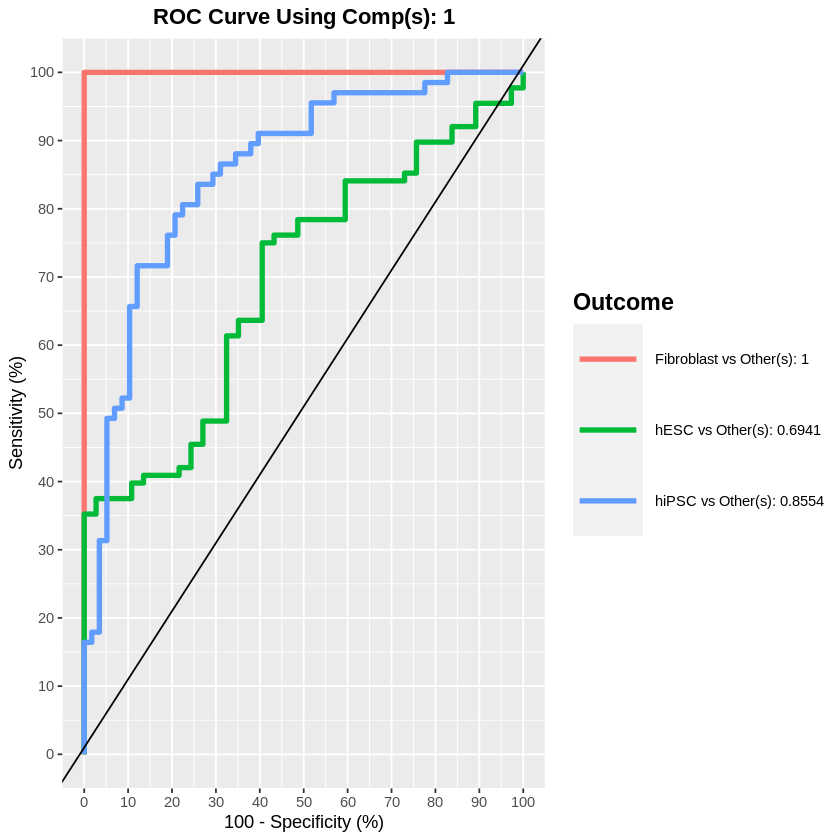

In [55]:
auroc(final.mint.splsda.stem, roc.comp = 1)

$Comp1
                          AUC   p-value
Fibroblast vs Other(s) 1.0000 4.799e-09
hESC vs Other(s)       0.6111 5.218e-01
hiPSC vs Other(s)      0.9460 7.529e-08



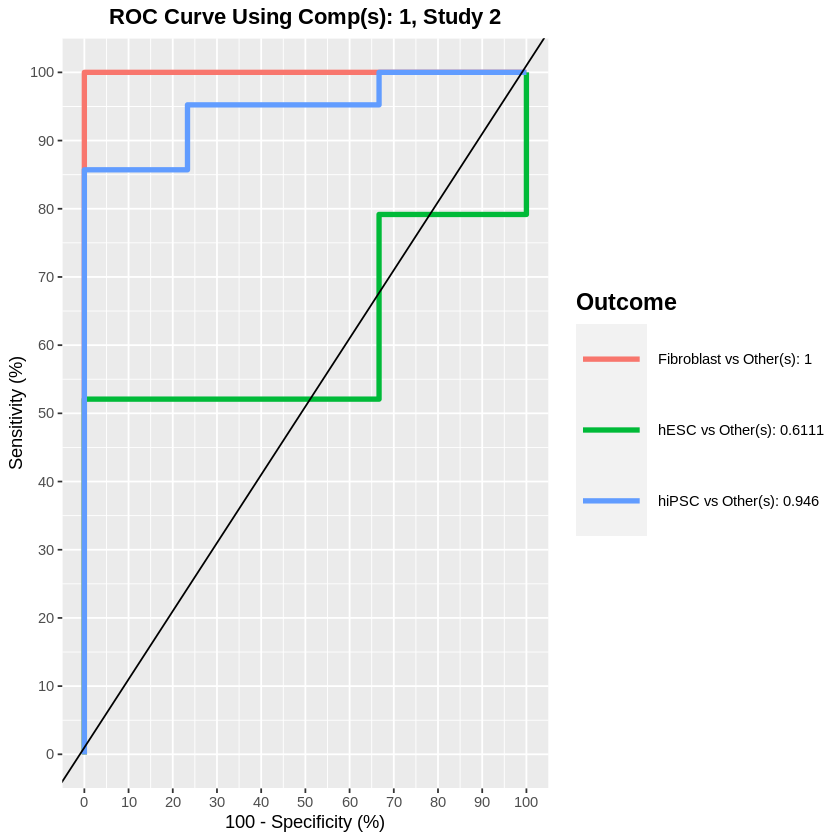

In [56]:
auroc(final.mint.splsda.stem, roc.comp = 1, roc.study = '2')

In [57]:
# We predict on study 3
indiv.test <- which(study == "3")

# We train on the remaining studies, with pre-tuned parameters
mint.splsda.stem2 <- mint.splsda(X = X[-c(indiv.test), ], 
                                Y = Y[-c(indiv.test)], 
                                study = droplevels(study[-c(indiv.test)]), 
                                ncomp = 1,  
                                keepX = 30)

mint.predict.stem <- predict(mint.splsda.stem2, newdata = X[indiv.test, ], 
                        dist = "centroids.dist",
                        study.test = factor(study[indiv.test]))

# Store class prediction with a model with 1 comp
indiv.prediction <- mint.predict.stem$class$centroids.dist[, 1]

# The confusion matrix compares the real subtypes with the predicted subtypes
conf.mat <- get.confusion_matrix(truth = Y[indiv.test],
                     predicted = indiv.prediction)

conf.mat

predicted.as.Fibroblast predicted.as.hESC predicted.as.hiPSC
Fibroblast 3                       0                 0                 
hESC       0                       4                 4                 
hiPSC      2                       2                 6

In [58]:
(sum(conf.mat) - sum(diag(conf.mat)))/sum(conf.mat)

[1] 0.3809524